#**DATA ANALYSIS ON QUANTIFYING THE IMPACT OF GEOPOLITICAL RISK, TRADE WAR, AND ENVIRONMENTAL SHOCKS ON THE GLOBAL FINANCIAL AND COMMODITY MARKETS**

#**DATA IMPORTATION:**

*We started our financial data analysis by collecting, cleaning, and preparing the data. Specifically, we gathered monthly time series data for five key variables, as shown in **Table 2** of our project paper. The S&P 500 index (sp500r) was used to represent the financial market, and global crude oil prices (oil) represented the commodity market. We manually calculated the log returns for both, which serve as our main dependent variables.
As for the independent variables, we used the geopolitical risk index (gpr) to capture geopolitical risk, the trade policy uncertainty index (twar) to represent trade tensions, and the climate policy uncertainty index (env) to reflect environmental shocks. All data was processed and cleaned using Microsoft Excel and uploaded into GitHub to serve as the extraction source . For full details on the variables, including how they’re measured and where the data came from, refer to **Table 2** in our paper.*

In [ ]:
!wget -O dataset.xlsx 'https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/dataset.xlsx'

--2025-05-21 09:47:43--  https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/dataset.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/dataset.xlsx [following]
--2025-05-21 09:47:43--  https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [ ]:
# Data Extraction

# Load the cleaned Excel dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, jarque_bera

# Read the cleaned dataset
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])

# Parse and index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Summary
print("Loaded dataset shape:", df.shape)
df

Loaded dataset shape: (420, 9)


sp500    sp500r    lsp500        oil      oilr         gpr  \
date                                                                           
1990-01-31   329.079987  0.008539  5.796301  22.863182 -0.033362   81.544044   
1990-02-28   331.890015  0.024255  5.804804  22.113000 -0.081233   77.407211   
1990-03-31   339.940002 -0.026887  5.828769  20.387727 -0.101198   67.591942   
1990-04-30   330.799988  0.091989  5.801514  18.425500 -0.012339   81.643845   
1990-05-31   361.230011 -0.008886  5.889515  18.199545 -0.086273   86.407120   
...                 ...       ...       ...        ...       ...         ...   
2024-08-31  5648.399902  0.020197  8.639128  76.683182 -0.087821  140.639374   
2024-09-30  5762.479980 -0.009897  8.659123  70.236000  0.024597  130.074173   
2024-10-31  5705.450195  0.057301  8.649177  71.985000 -0.028677  130.826721   
2024-11-30  6032.379883 -0.020794  8.704897  69.950000  0.002400  128.320312   
2024-12-31  5906.939941 -1.000000  8.683883  70.118095       NaN  141.334885   

                  twar         env         epu  
date                                            
1990-01-31   30.920652   57.681392    0.000000  
1990-02-28   30.685625  135.388264    0.000000  
1990-03-31   36.767010  112.254839    0.000000  
1990-04-30   36.441399  114.704969    0.000000  
1990-05-31   37.740570   93.407382    0.000000  
...                ...         ...         ...  
2024-08-31   98.140496  302.748764  225.378325  
2024-09-30  128.640601  155.063845  223.007104  
2024-10-31  147.926890  248.148984  223.640869  
2024-11-30  373.312153  422.186810  365.206009  
2024-12-31  247.675600  293.329612  377.073675  

[420 rows x 9 columns]

#**PRELIMINARY INVESTIGATIONS:**

*As part of our preliminary investigations, we began with trend analysis to review past trends and events and observe how geopolitical risk, trade tensions, and environmental shocks relate to fluctuations in the global commodity and financial markets. We then conducted descriptive analysis to provide descriptive statistics—such as the mean, median, minimum, maximum, standard deviation, and kurtosis—for all variables under consideration. To examine the strength and direction of the variable association and to check for multicollinearity, we used correlation analysis complemented with visual plots such as the correlation heatmap, ACF, and PACF. We tested the stationarity of the data using Augmented Dickey-Fuller (ADF) and Phillips-Perron (PP) tests at levels and first differences, focusing particularly on the primary dependent and independent variables. We also conducted cointegration tests: Johansen's multivariate test for testing long-run equilibrium among all the variables, and the Engle-Granger test for testing pairwise cointegration between each independent and dependent variable. To test for structural breaks in the financial and commodity markets, we used the Chow test for single break points and the Bai-Perron test for multiple breaks, testing whether these breaks coincided with major uncertainty events. Last but not least, we performed lag selection tests according to AIC, BIC, and HQIC criteria in order to choose the number of lags for our models, particularly for the GARCH family of models.*

**TREND ANALYSIS:**

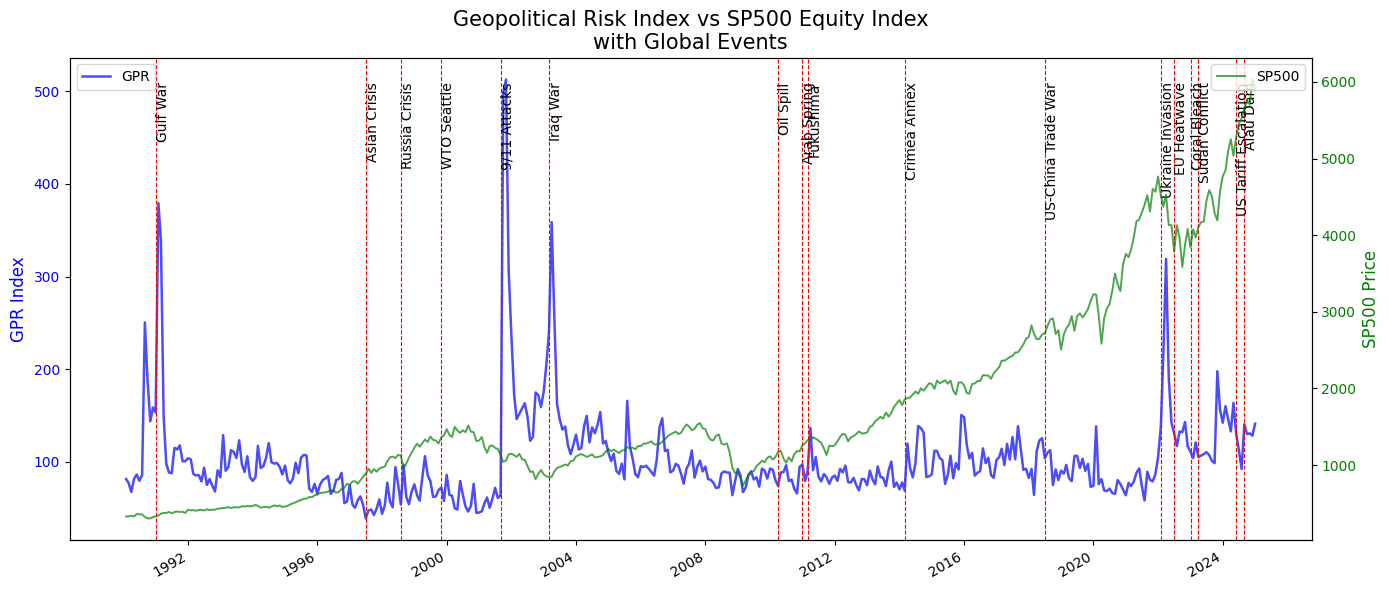

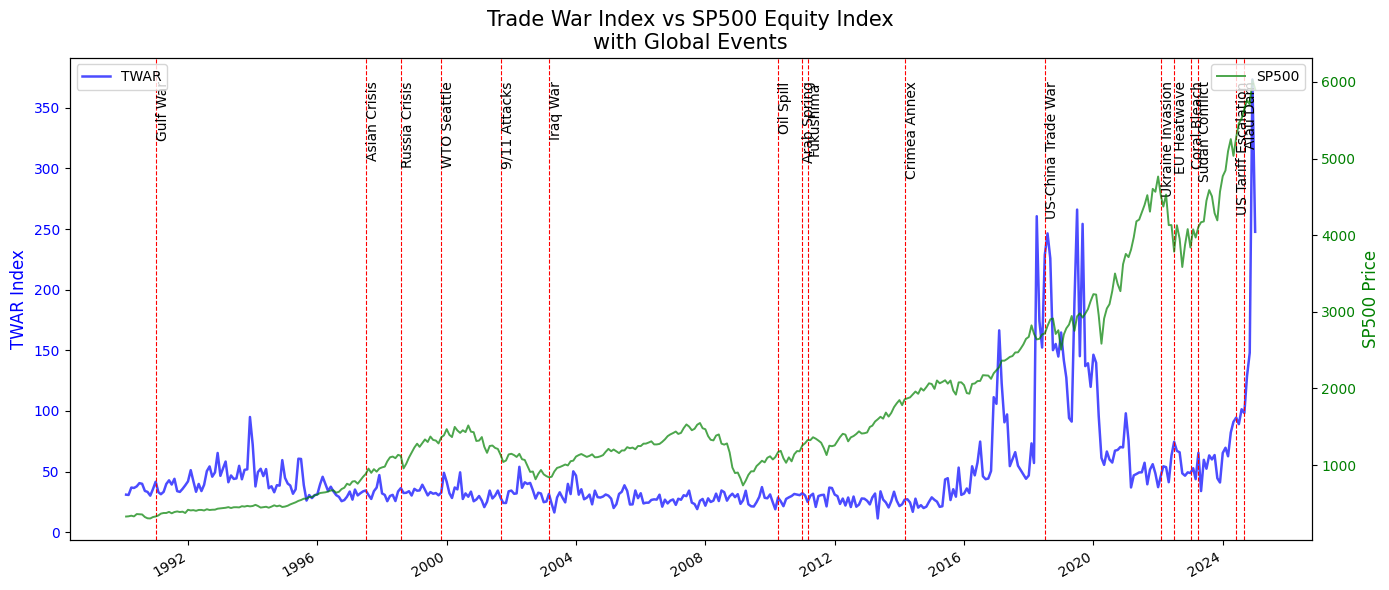

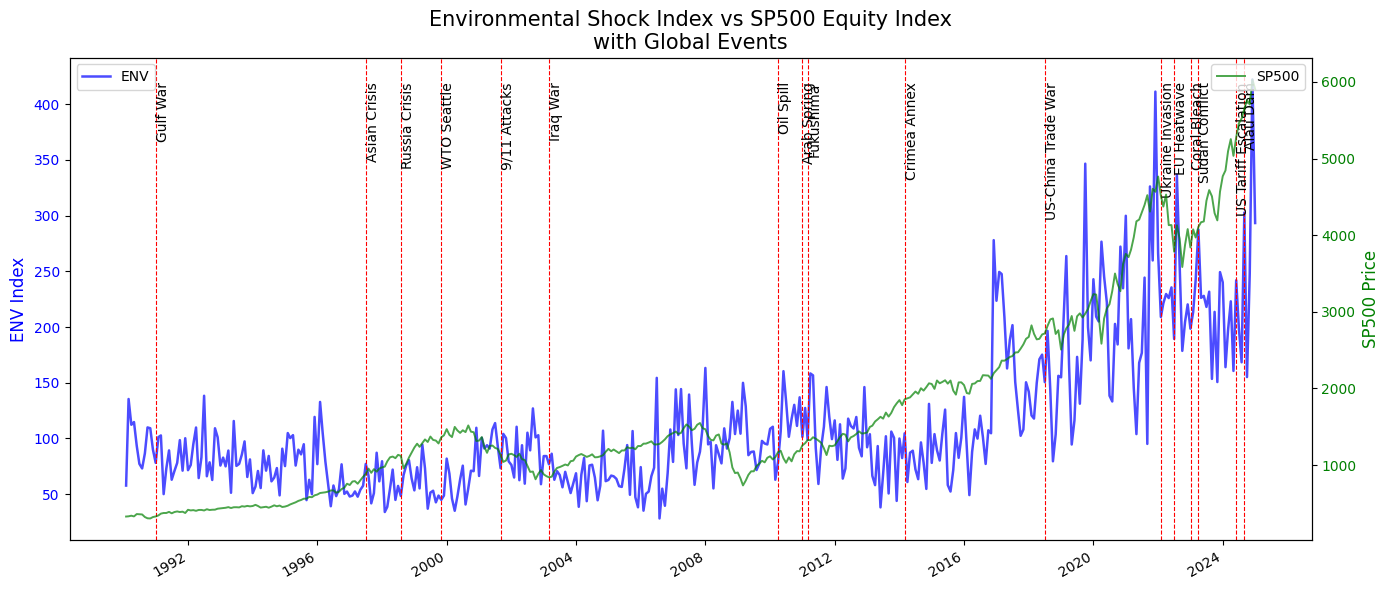

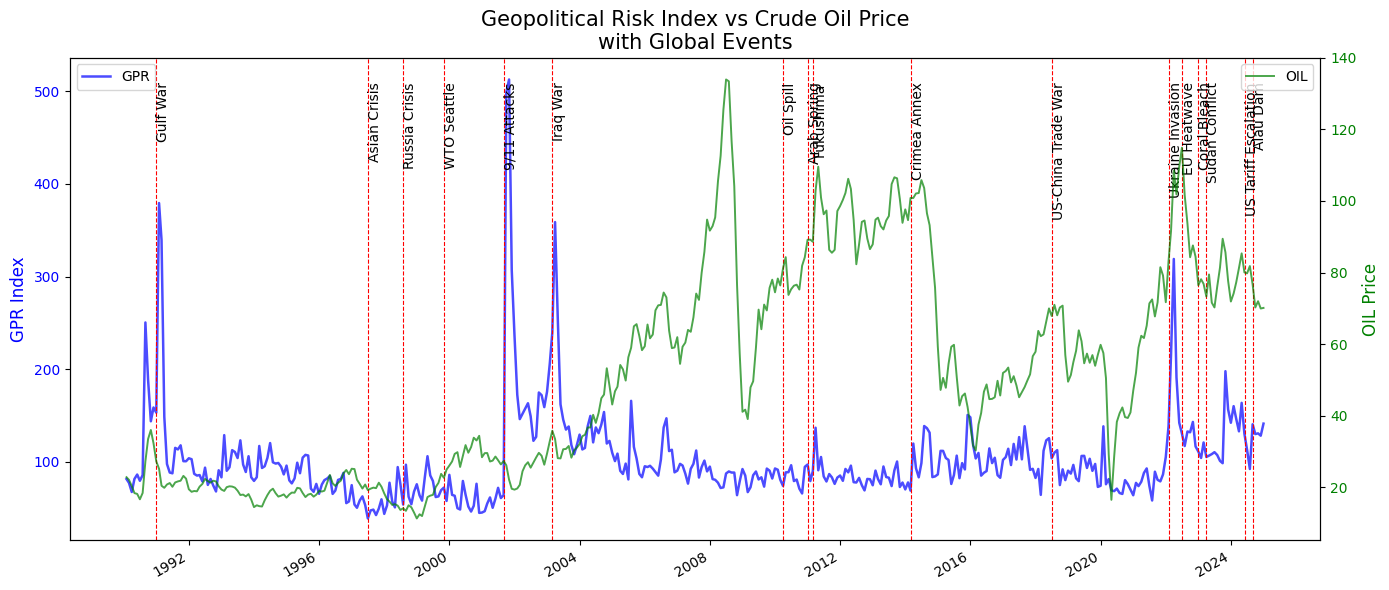

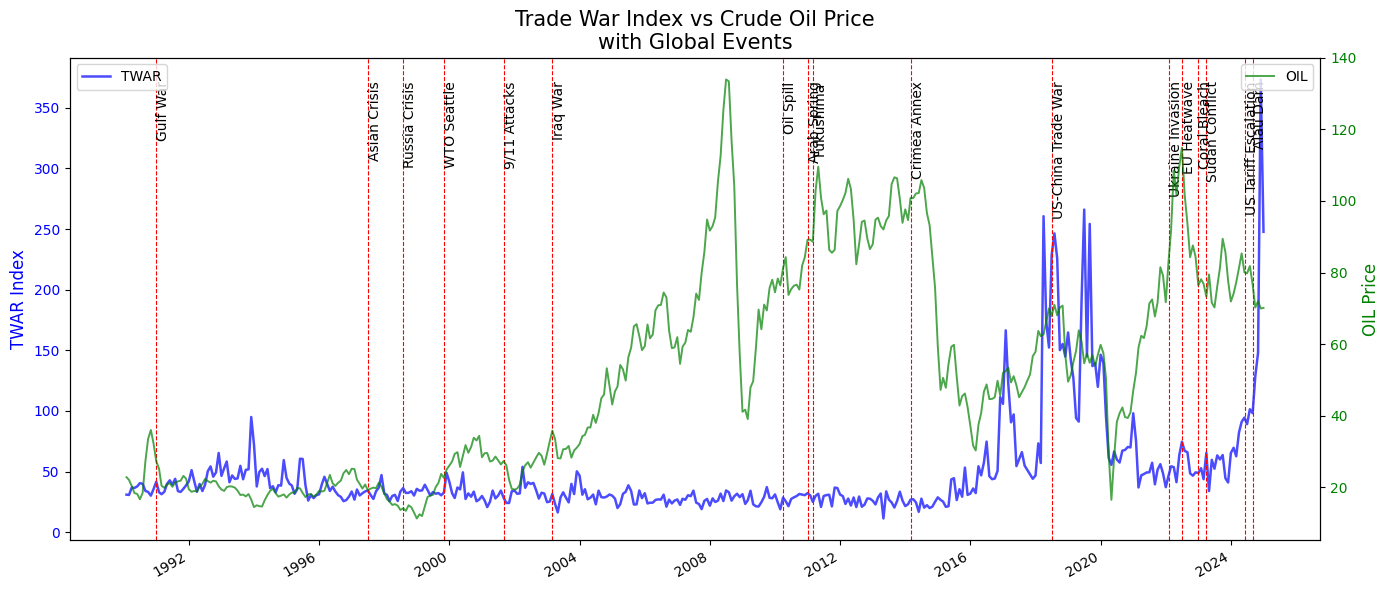

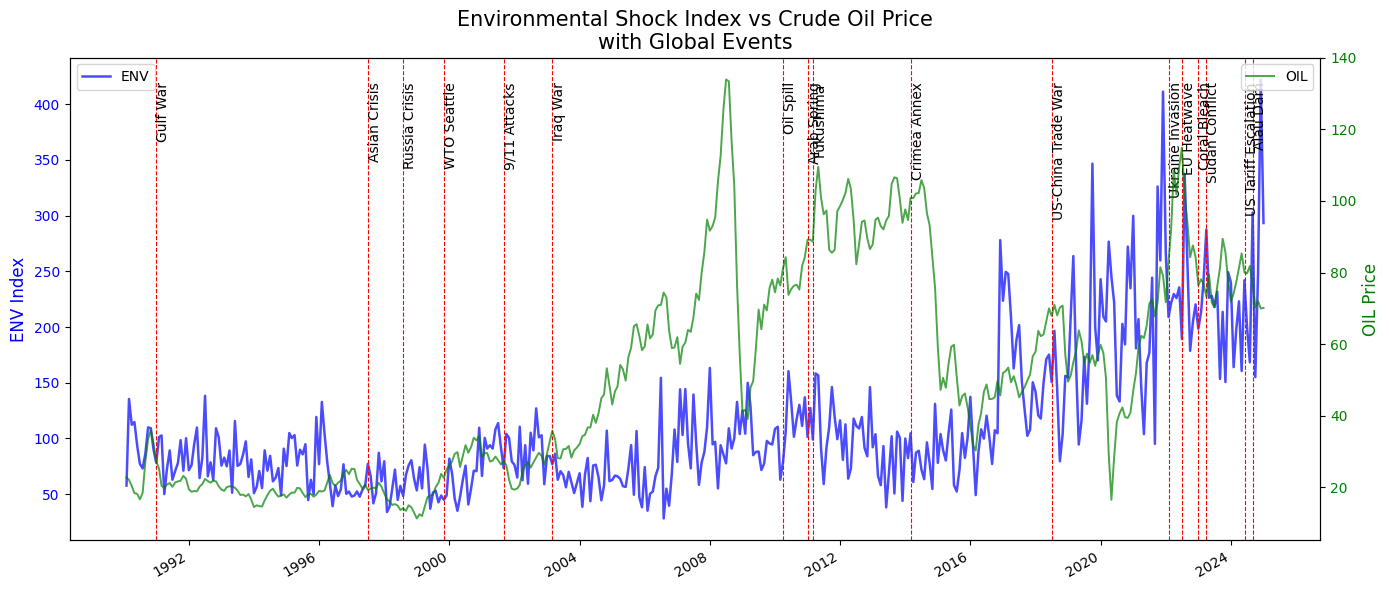

In [ ]:
# Trend Analysis

# Define event timeline by category
events = {
    'Geopolitical': {
        '1991-01': "Gulf War",
        '1997-07': "Asian Crisis",
        '1998-08': "Russia Crisis",
        '2001-09': "9/11 Attacks",
        '2003-03': "Iraq War",
        '2011-01': "Arab Spring",
        '2014-03': "Crimea Annex",
        '2022-02': "Ukraine Invasion",
        '2023-04': "Sudan Conflict"
    },
    'Trade War': {
        '1999-11': "WTO Seattle",
        '2018-07': "US-China Trade War",
        '2024-06': "US Tariff Escalation"
    },
    'Environmental': {
        '2010-04': "Oil Spill",
        '2011-03': "Fukushima",
        '2022-07': "EU Heatwave",
        '2023-01': "Coral Bleach",
        '2024-09': "Alau Dam"
    }
}

# List of plots to generate
plot_pairs = [
    ('gpr', 'sp500', 'Geopolitical Risk Index vs SP500 Equity Index'),
    ('twar', 'sp500', 'Trade War Index vs SP500 Equity Index'),
    ('env', 'sp500', 'Environmental Shock Index vs SP500 Equity Index'),
    ('gpr', 'oil', 'Geopolitical Risk Index vs Crude Oil Price'),
    ('twar', 'oil', 'Trade War Index vs Crude Oil Price'),
    ('env', 'oil', 'Environmental Shock Index vs Crude Oil Price'),
]

# Plot the relational graphs
for x, y, title in plot_pairs:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot uncertainty index
    ax1.plot(df.index, df[x], color='blue', label=x.upper(), linewidth=1.8, alpha=0.7)
    ax1.set_ylabel(f"{x.upper()} Index", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Twin axis for index
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[y], color='green', label=y.upper(), linewidth=1.4, alpha=0.7)
    ax2.set_ylabel(f"{y.upper()} Price", color='green', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='green')

    # Annotate historical events
    for category, event_dict in events.items():
        for event_date, label in event_dict.items():
            event_date = pd.to_datetime(event_date)
            if df.index.min() <= event_date <= df.index.max():
                ax1.axvline(event_date, color='red', linestyle='--', linewidth=0.8)
                ax1.text(event_date, ax1.get_ylim()[1]*0.95, label, rotation=90,
                         fontsize=10, color='black', verticalalignment='top')

    # Title and formatting
    plt.title(f"{title}\nwith Global Events", fontsize=15)
    fig.autofmt_xdate()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

**DESCRIPTIVE ANALYSIS:**

In [ ]:
# Descriptive Analysis

# Target variables
vars_list = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
desc = pd.DataFrame(index=vars_list)

# Compute descriptive statistics
desc['Mean'] = df[vars_list].mean()
desc['Median'] = df[vars_list].median()
desc['Min'] = df[vars_list].min()
desc['Max'] = df[vars_list].max()
desc['Std Dev'] = df[vars_list].std()
desc['Skewness'] = df[vars_list].apply(skew)
desc['Kurtosis'] = df[vars_list].apply(kurtosis)

# Display table
desc = desc.round(3)
print("Summary of Descriptive Statistics:\n")
display(desc)

Summary of Descriptive Statistics:



Mean  Median     Min      Max  Std Dev  Skewness  Kurtosis
sp500r    0.005   0.012  -1.000    0.127    0.065    -8.926   134.178
oilr      0.003   0.013  -0.568    0.546    0.097       NaN       NaN
gpr     102.116  90.591  39.046  512.530   50.307     4.077    24.382
twar     47.753  33.797  11.299  373.312   41.494     3.713    17.132
env     110.680  92.249  28.162  422.187   64.243     1.663     3.064

*The descriptive statistics reveal that both the returns on S&P 500 (sp500r) and the returns on oil (oilr) also possess low average values, with sp500r possessing extreme negative skewness and a very high degree of kurtosis indicating the presence of outliers and heavy tails. The returns on oil also possess more volatility (standard deviation of 0.097) but zero values for skewness and kurtosis. Among the independent variables, geopolitical risk (gpr), trade policy uncertainty (twar), and environmental uncertainty (env) all exhibit positive skewness and high kurtosis, which reflect non-normal distributions with intermittent peaks in uncertainty. The variables as a group exhibit significant variation and nonlinearity, and further time series modeling is called for.*

**CORRELATION ANALYSIS:**

In [ ]:
# Correlation Analysis

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select relevant columns
vars_corr = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
corr_matrix = df[vars_corr].corr().round(3)

# Print correlation matrix
print("Pearson Correlation Matrix:\n")
corr_matrix

Pearson Correlation Matrix:



sp500r   oilr    gpr   twar    env
sp500r   1.000  0.068  0.001 -0.172 -0.084
oilr     0.068  1.000 -0.096 -0.024 -0.023
gpr      0.001 -0.096  1.000  0.025  0.098
twar    -0.172 -0.024  0.025  1.000  0.530
env     -0.084 -0.023  0.098  0.530  1.000

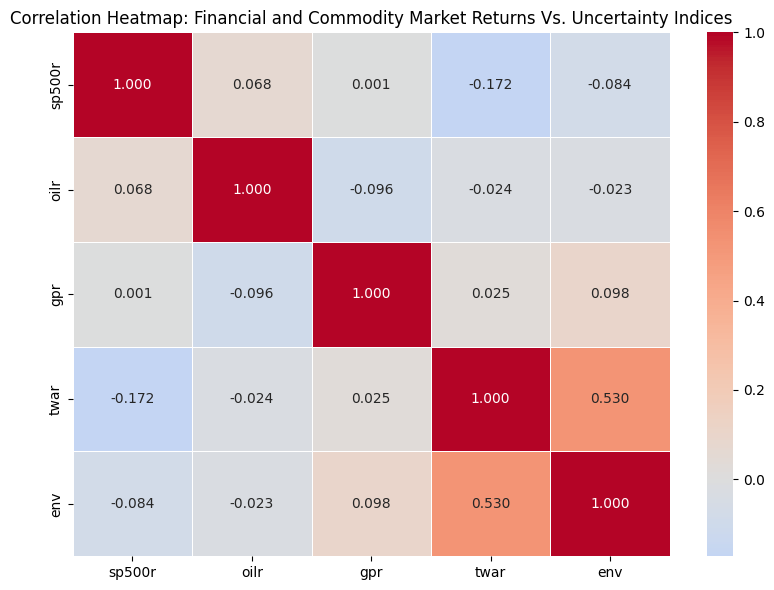

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".3f")
plt.title("Correlation Heatmap: Financial and Commodity Market Returns Vs. Uncertainty Indices", fontsize=12)
plt.tight_layout()
plt.show()

*The correlation matrix shows that sp500r are weakly positively correlated with the oilr (0.068) and nearly zero-correlated with gpr  (0.001), while weakly negatively correlated with twar (-0.172) and env (-0.084). Oilr are weakly correlated with every measure of uncertainty, with the strongest being a weak negative correlation with gpr (-0.096). Among the uncertainty indicators, twar and env are positively related with a moderate level (0.530), meaning they may often rise together quite often. The low correlation values, thus, the presence of non-linearlity and the absence of multicollinearity and autocorrelation issues within the model.*

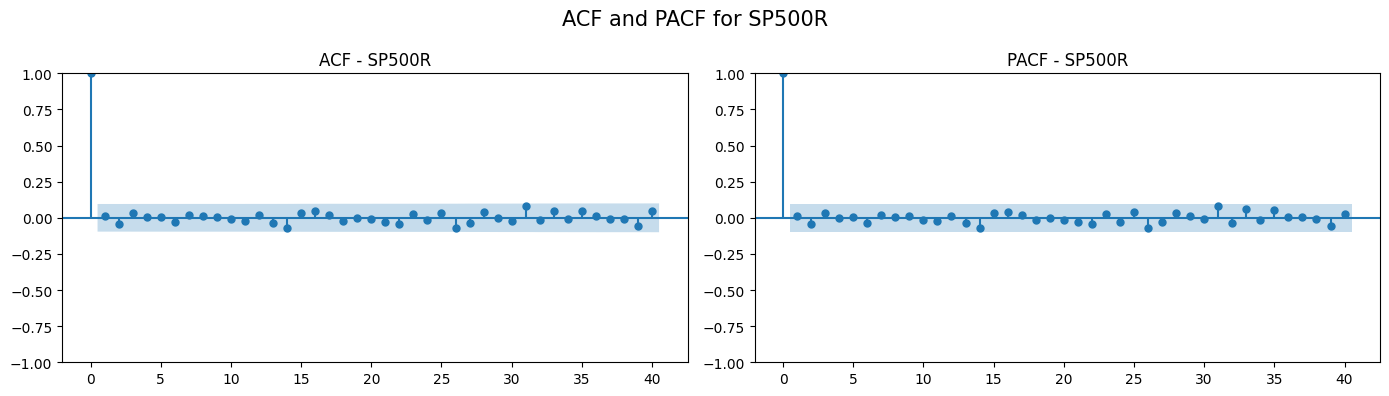

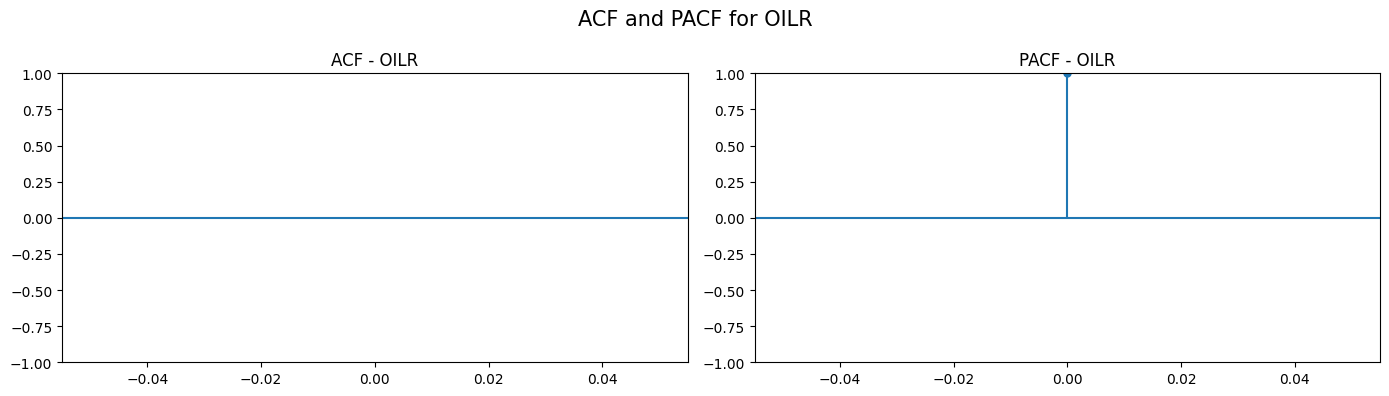

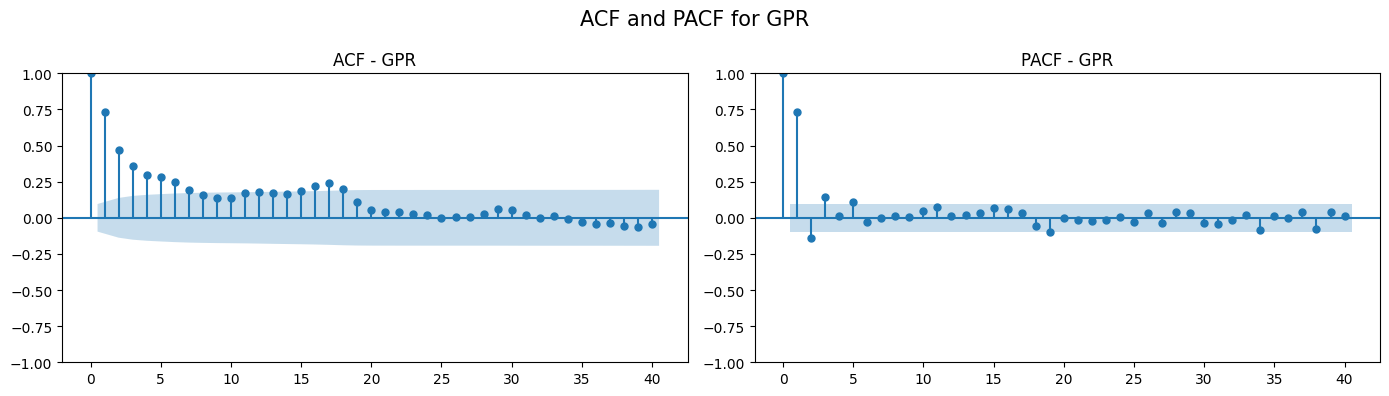

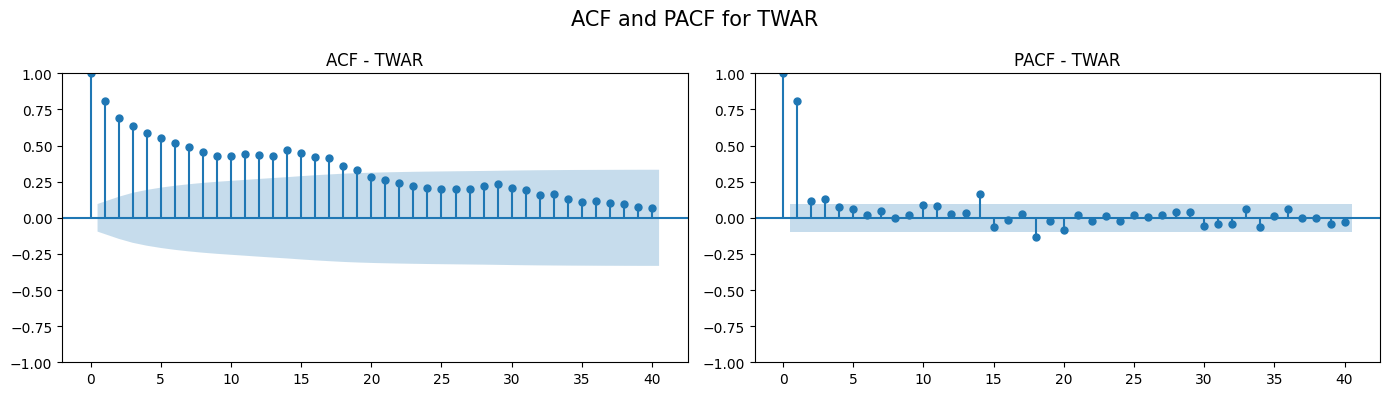

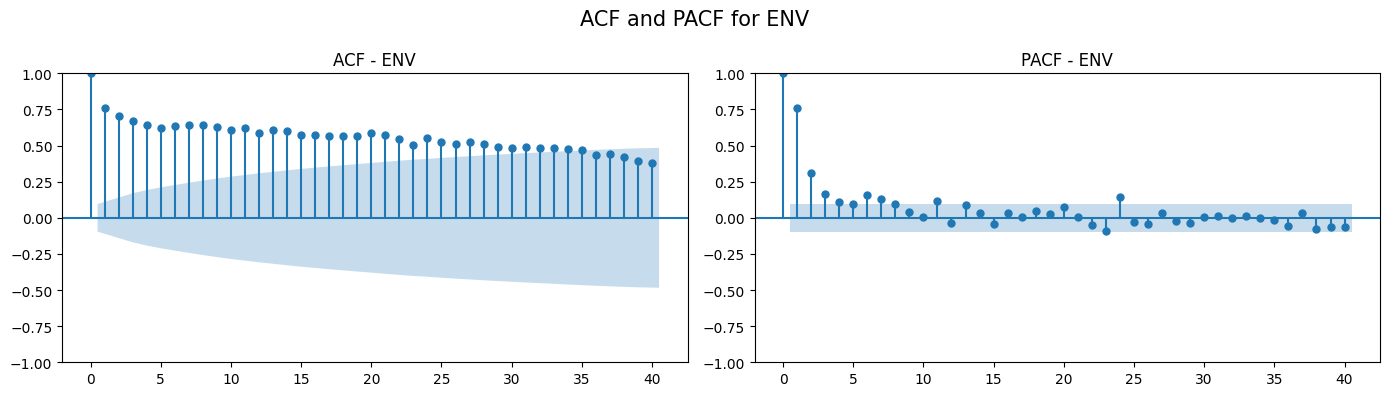

In [ ]:
# Autocorrelation and Partial Autocorrelation Tests

# Plot ACF and PACF for each variabe
targets = ['sp500r', 'oilr', 'gpr', 'twar', 'env']

for var in targets:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"ACF and PACF for {var.upper()}", fontsize=15)

    # ACF
    plot_acf(df[var], lags=40, ax=axes[0], title=f"ACF - {var.upper()}")
    # PACF
    plot_pacf(df[var], lags=40, ax=axes[1], title=f"PACF - {var.upper()}", method='ywm')

    plt.tight_layout()
    plt.show()

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 34.1 MB/s eta 0:00:00


**STATIONARITY ANALYSIS:**

In [ ]:
# Stationarity Tests

from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

def stationarity_decision(p_value, alpha=0.05):
    return 'Stationary' if p_value < alpha else 'Non-Stationary'

def adf_pp_test(series, name):
    """
    Perform ADF and PP tests at level and first difference.
    Returns a dictionary with test statistics, p-values, and decisions.
    """
    results = {}

    # ADF at level
    adf_lvl = adfuller(series, regression='c', autolag='AIC')
    results['ADF Stat (Level)'] = round(adf_lvl[0], 3)
    results['ADF p-value (Level)'] = round(adf_lvl[1], 4)
    results['ADF Remark (Level)'] = stationarity_decision(adf_lvl[1])

    # ADF at first difference
    adf_diff = adfuller(series.diff().dropna(), regression='c', autolag='AIC')
    results['ADF Stat (1st Diff)'] = round(adf_diff[0], 3)
    results['ADF p-value (1st Diff)'] = round(adf_diff[1], 4)
    results['ADF Remark (1st Diff)'] = stationarity_decision(adf_diff[1])

    # PP at level
    pp_lvl = PhillipsPerron(series, trend='c', lags=4)
    results['PP Stat (Level)'] = round(pp_lvl.stat, 3)
    results['PP p-value (Level)'] = round(pp_lvl.pvalue, 4)
    results['PP Remark (Level)'] = stationarity_decision(pp_lvl.pvalue)

    # PP at first difference
    pp_diff = PhillipsPerron(series.diff().dropna(), trend='c', lags=4)
    results['PP Stat (1st Diff)'] = round(pp_diff.stat, 3)
    results['PP p-value (1st Diff)'] = round(pp_diff.pvalue, 4)
    results['PP Remark (1st Diff)'] = stationarity_decision(pp_diff.pvalue)

    return results

# Define variables to test
test_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
stationarity_full = {}

# Run stationarity tests
for var in test_vars:
    stationarity_full[var] = adf_pp_test(df[var].dropna(), var)

# Convert to structured DataFrame
stationarity_table = pd.DataFrame(stationarity_full).T
stationarity_table.index.name = 'Variable'

# Display the stationarity table
print("ADF and PP Stationarity Test Results (α = 0.05)")
display(stationarity_table)

ADF and PP Stationarity Test Results (α = 0.05)


ADF Stat (Level) ADF p-value (Level) ADF Remark (Level)  \
Variable                                                           
sp500r            -10.171                 0.0         Stationary   
oilr              -13.755                 0.0         Stationary   
gpr                -6.802                 0.0         Stationary   
twar               -1.397              0.5839     Non-Stationary   
env                 0.047              0.9623     Non-Stationary   

         ADF Stat (1st Diff) ADF p-value (1st Diff) ADF Remark (1st Diff)  \
Variable                                                                    
sp500r                 -5.76                    0.0            Stationary   
oilr                  -8.347                    0.0            Stationary   
gpr                   -8.867                    0.0            Stationary   
twar                  -2.451                 0.1278        Non-Stationary   
env                   -8.433                    0.0            Stationary   

         PP Stat (Level) PP p-value (Level) PP Remark (Level)  \
Variable                                                        
sp500r           -12.794                0.0        Stationary   
oilr             -15.074                0.0        Stationary   
gpr               -7.834                0.0        Stationary   
twar              -4.388             0.0003        Stationary   
env               -6.432                0.0        Stationary   

         PP Stat (1st Diff) PP p-value (1st Diff) PP Remark (1st Diff)  
Variable                                                                
sp500r              -25.058                   0.0           Stationary  
oilr                 -34.04                   0.0           Stationary  
gpr                 -21.741                   0.0           Stationary  
twar                -29.643                   0.0           Stationary  
env                 -38.781                   0.0           Stationary

*The unit root tests indicate that all variables except twar and env—such as sp500r, oilr, and gpr—are stationary at level according to both ADF and PP tests. But twar and env are non-stationary at level in the ADF test but become stationary after first differencing in the ADF test, but according to the PP test, they were also stationary at their level form. In conclusion, the results support that no variable transformation is required in order to offer an adequate model since they were all stationary at their levels according to the PP test.*

**COINTEGRATION ANALYSIS:**

**COMBINED COINTEGRATION TEST:**

In [ ]:
# Johansen Cointegration Test

from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Variables to test
johansen_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
joh_data = df[johansen_vars].dropna()

# Johansen test (det_order = -1: automatically select)
joh_result = coint_johansen(joh_data, det_order=0, k_ar_diff=2)

# Trace statistic and critical values
trace_stat = joh_result.lr1
trace_cv = joh_result.cvt

# Max eigenvalue statistic and critical values
maxeig_stat = joh_result.lr2
maxeig_cv = joh_result.cvm

# Compile results into structured DataFrame
johansen_df = pd.DataFrame({
    'Rank (r)': [f"r ≤ {i}" for i in range(len(trace_stat))],
    'Trace Statistic': np.round(trace_stat, 3),
    'Trace CV (5%)': trace_cv[:, 1],
    'Trace Result': ['Reject' if stat > cv else 'Do Not Reject'
                     for stat, cv in zip(trace_stat, trace_cv[:, 1])],
    'MaxEig Statistic': np.round(maxeig_stat, 3),
    'MaxEig CV (5%)': maxeig_cv[:, 1],
    'MaxEig Result': ['Reject' if stat > cv else 'Do Not Reject'
                      for stat, cv in zip(maxeig_stat, maxeig_cv[:, 1])]
})

print("Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)")
display(johansen_df)

Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)


Rank (r)  Trace Statistic  Trace CV (5%)   Trace Result  MaxEig Statistic  \
0    r ≤ 0          339.534        69.8189         Reject           151.096   
1    r ≤ 1          188.438        47.8545         Reject           114.408   
2    r ≤ 2           74.030        29.7961         Reject            47.861   
3    r ≤ 3           26.169        15.4943         Reject            25.296   
4    r ≤ 4            0.873         3.8415  Do Not Reject             0.873   

   MaxEig CV (5%)  MaxEig Result  
0         33.8777         Reject  
1         27.5858         Reject  
2         21.1314         Reject  
3         14.2639         Reject  
4          3.8415  Do Not Reject

*The Johansen cointegration test shows that trace and maximum eigenvalue statistics significantly surpass their corresponding critical values from ranks 0 to 3, and thus the null hypothesis of no cointegration through rank 3 is rejected. The null is rejected at rank 4, and this shows that there are four cointegrating relationships among the variables. This shows there is a great long-run equilibrium relationship among the financial, commodity, and uncertainty variables in the model.*

**INDIVIDUAL COINTEGRATION TEST:**

In [ ]:
# Engle-Granger Linear Cointegration Test

from statsmodels.tsa.stattools import coint

# Define pairwise combinations
eg_pairs = [
    ('sp500r', 'gpr'),
    ('sp500r', 'twar'),
    ('sp500r', 'env'),
    ('oilr', 'gpr'),
    ('oilr', 'twar'),
    ('oilr', 'env'),
]

eg_results = []

# Loop through each pair
for y, x in eg_pairs:
    aligned_data = df[[y, x]].dropna()
    coint_result = coint(aligned_data[y], aligned_data[x])
    test_stat, p_value, _ = coint_result
    eg_results.append({
        'Dependent': y,
        'Independent': x,
        'Test Statistic': round(test_stat, 3),
        'p-value': round(p_value, 4),
        'Result': 'Cointegrated' if p_value < 0.05 else 'Not Cointegrated'
    })

# Convert to DataFrame
eg_df = pd.DataFrame(eg_results)
print("Engle-Granger Cointegration Results (5% Level)")
display(eg_df)

Engle-Granger Cointegration Results (5% Level)


Dependent Independent  Test Statistic  p-value        Result
0    sp500r         gpr         -10.209      0.0  Cointegrated
1    sp500r        twar          -8.404      0.0  Cointegrated
2    sp500r         env         -10.606      0.0  Cointegrated
3      oilr         gpr         -13.711      0.0  Cointegrated
4      oilr        twar         -13.792      0.0  Cointegrated
5      oilr         env         -13.768      0.0  Cointegrated

*The Engle-Granger cointegration tests indicate there exist statistically significant test statistics having p-values of 0.00 for all pairs of independent and dependent variables, thus affirming cointegration at 5%. This confirms the presence of long-run equilibrium relationships between both oilr and sp500r with each of the variables of uncertainty (gpr, twar, and env).*

**STRUCTURAL BREAK TEST:**

**SINGLE BREAK POINT:**

In [ ]:
# Chow Single Break Test for Model 1 (Financial Market) and Model 2 (Commodity Market)

import statsmodels.api as sm
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from datetime import datetime

def chow_test(df, yvar, xvars, break_date_str):
    """
    Performs Chow test at a known break date.
    """
    break_date = pd.to_datetime(break_date_str)
    data = df[[yvar] + xvars].dropna()

    # Split data into pre-break and post-break samples
    pre = data[data.index < break_date]
    post = data[data.index >= break_date]

    # Prepare regression variables
    X_pre = sm.add_constant(pre[xvars])
    y_pre = pre[yvar]
    X_post = sm.add_constant(post[xvars])
    y_post = post[yvar]

    # Regressions
    model_full = sm.OLS(data[yvar], sm.add_constant(data[xvars])).fit()
    model_pre = sm.OLS(y_pre, X_pre).fit()
    model_post = sm.OLS(y_post, X_post).fit()

    # Chow F-test calculation
    RSS_full = sum(model_full.resid ** 2)
    RSS_pre = sum(model_pre.resid ** 2)
    RSS_post = sum(model_post.resid ** 2)

    k = len(xvars) + 1  # number of parameters
    n_pre = len(pre)
    n_post = len(post)
    n_total = n_pre + n_post

    F_chow = ((RSS_full - (RSS_pre + RSS_post)) / k) / ((RSS_pre + RSS_post) / (n_total - 2 * k))

    return {
        'Break Date': break_date_str,
        'F-statistic': round(F_chow, 3),
        'Decision (5%)': 'Structural Break' if F_chow > 3 else 'No Break'
    }

# Define Chow test breakpoints
break_dates = ['2001-09-11', '2022-02-24']  # 9/11 and Ukraine Invasion

# Test SP500R and OILR around these dates
chow_results = []

for date in break_dates:
    chow_results.append({**chow_test(df, 'sp500r', ['gpr', 'twar', 'env'], date), 'Variable': 'sp500r'})
    chow_results.append({**chow_test(df, 'oilr', ['gpr', 'twar', 'env'], date), 'Variable': 'oilr'})

# Display results
chow_df = pd.DataFrame(chow_results)[['Variable', 'Break Date', 'F-statistic', 'Decision (5%)']]
print("Chow Structural Break Results")
display(chow_df)

Chow Structural Break Results


Variable  Break Date  F-statistic     Decision (5%)
0   sp500r  2001-09-11        0.211          No Break
1     oilr  2001-09-11        0.562          No Break
2   sp500r  2022-02-24       13.673  Structural Break
3     oilr  2022-02-24        0.144          No Break

*The Chow test identifies a structural break in S&P 500 returns (sp500r) on the date of 24-Feb-2022, most likely as a consequence of the Russia-Ukraine war, since the F-statistic is greater than the 5% critical value. There are no structural breaks for oil returns (oilr) or at the event of 9/11 in 2001 for either of the variables.*

**MULTIPLE BREAK POINT:**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.8 MB/s eta 0:00:00

Bai-Perron Structural Breakpoints for SP500R
Detected Break Dates:
 - 2008-08
 - 2009-02
 - 2020-01
 - 2020-03
 - 2024-11


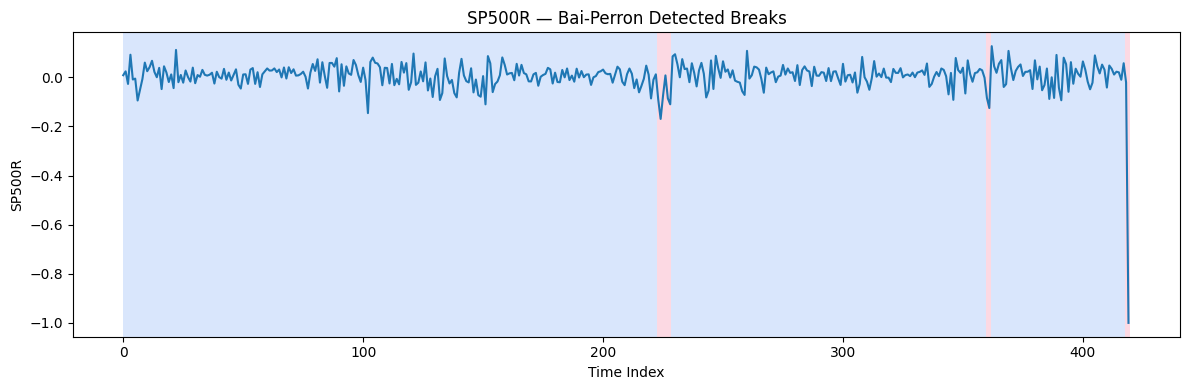


Bai-Perron Structural Breakpoints for OILR
Detected Break Dates:
 - 2008-09
 - 2008-12
 - 2020-02
 - 2020-04
 - 2020-06


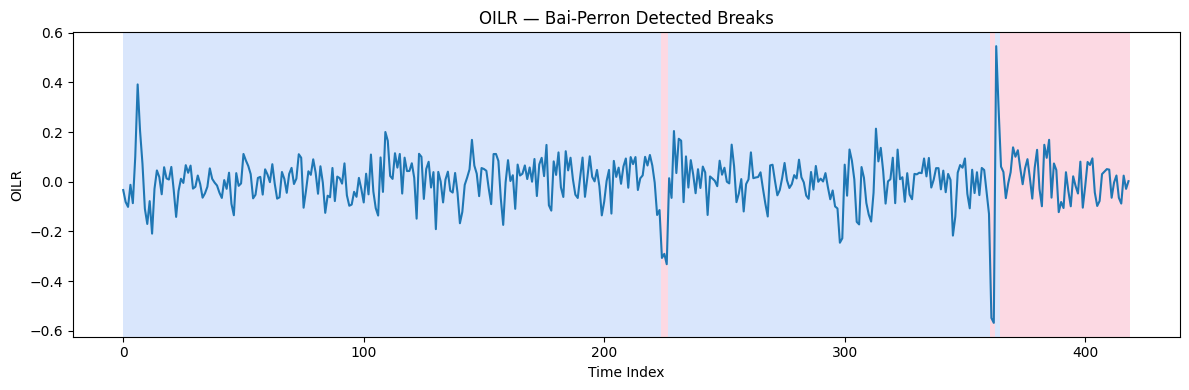

In [ ]:
# Bai-Perron Multiple Break test for Model 1 (Financial Market) and Model 2 (Commodity Market)

!pip install ruptures
import ruptures as rpt

def bai_perron_breaks(series, model="l2", penalty='bic', max_bkps=5):
    """
    Applies Bai-Perron break detection via 'ruptures'.
    """
    algo = rpt.KernelCPD(kernel="linear").fit(series.values.reshape(-1, 1))
    breakpoints = algo.predict(n_bkps=max_bkps)
    return breakpoints

# Run Bai-Perron on SP500 and OIL returns
for var in ['sp500r', 'oilr']:
    print(f"\nBai-Perron Structural Breakpoints for {var.upper()}")
    series = df[var].dropna()
    bkps = bai_perron_breaks(series)
    break_dates = series.index[bkps[:-1]]  # exclude final dummy break
    print("Detected Break Dates:")
    for date in break_dates:
        print(" -", date.strftime('%Y-%m'))

    # Plot
    rpt.display(series.values, bkps, figsize=(12, 4))
    plt.title(f"{var.upper()} — Bai-Perron Detected Breaks")
    plt.xlabel("Time Index")
    plt.ylabel(var.upper())
    plt.tight_layout()
    plt.show()

*The Bai-Perron test identifies multiple structural breaks in SP500R and OILR series, which relate to major global events. Breakpoints during the period of the 2008 financial crisis, the first 2020 COVID-19 period, and a more recent 2024 shift in SP500R suggest catastrophic market disruption. Correspondingly, the OILR also shows breakpoints during the 2008 crisis and a series of events across the early months of the COVID-19 pandemic, suggesting multiple structural changes resulting from economic shocks.*

**LAG SELECTION CRITERIA TEST:**

In [ ]:
# Lag selection test

from statsmodels.tsa.api import VAR

# Target variables
lag_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
lag_data = df[lag_vars].dropna()

# Fit the VAR model and determine optimal lag up to 5
var_model = VAR(lag_data)
lag_selection = var_model.select_order(maxlags=5)

# Extract results as a DataFrame
lag_summary = pd.DataFrame({
    'Lag': range(1, 6),
    'AIC': lag_selection.aic,
    'BIC': lag_selection.bic,
    'HQIC': lag_selection.hqic
}).set_index('Lag')

# Identify optimal lags for each criterion
optimal_lags = {
    'AIC': lag_summary['AIC'].idxmin(),
    'BIC': lag_summary['BIC'].idxmin(),
    'HQIC': lag_summary['HQIC'].idxmin()
}

# Display lag selection table
print("Lag Selection Table (Lags 1 to 5):")
display(lag_summary.round(3))

# Show optimal lag summary
print("\nOptimal Lag Based on Criteria:")
for criterion, opt_lag in optimal_lags.items():
    print(f" - {criterion}: {opt_lag} lags")

Lag Selection Table (Lags 1 to 5):


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


AIC  BIC  HQIC
Lag                
1      3    1     2
2      3    1     2
3      3    1     2
4      3    1     2
5      3    1     2


Optimal Lag Based on Criteria:
 - AIC: 1 lags
 - BIC: 1 lags
 - HQIC: 1 lags


*The lag selection criteria (AIC, BIC, and HQIC) all point in the same direction to the model's optimal number of lags being 1. That is, to take one lag is to gain the best balance between model complexity and fit for the time series analysis.*

#**ESTIMATION AND MODELING:**

*This section analyzes the endogenous dynamics of volatility of the commodity and world financial markets without external shocks. Through regime shift modeling, we explore how market volatility changes over time between stability and crisis phases. This serves as a baseline to enjoy the natural trend of each market before we introduce the influence of geopolitical, trade, and environmental shocks.*

**FINANCIAL MARKET REGIME-VOLATILITY (WITHOUT EXTERNAL SHOCKS):**

In [ ]:
# FINANCIAL MARKET REGIME-VOLATILITY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Financial Market Model
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])
df.set_index('date', inplace=True)
returns = df['sp500r'].dropna().values  # SP500 returns
T = len(returns)

# Initialize regimes and parameters
k = 2  # Number of regimes
S = np.zeros((T, k))        # State probabilities
loglik = []                 # Log-likelihood trace
tol = 1e-5                  # Convergence tolerance
max_iter = 300              # Max EM iterations
np.random.seed(42)          # Reproducibility

# Transition matrix P initialization
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial GARCH parameters by regime: (omega, alpha, beta, mu)
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0},
    1: {'omega': 0.02, 'alpha': 0.2, 'beta': 0.7, 'mu': 0.0}
}

# Initial variances for each regime
sigma2 = np.full((T, k), 0.02)
gamma = np.full((T, k), 1/k)  # Initial state probability: uniform

print("Initialization complete.")

Initialization complete.


In [ ]:
# FINANCIAL MARKET REGIME VOLATILITY: Expected Maximization Algorithm for MS-GARCH(1,1)

from scipy.stats import norm
from scipy.optimize import minimize, Bounds

def garch_likelihood(params_vec, r, sigma2_init):
    omega, alpha, beta, mu = params_vec
    T = len(r)
    sigma2 = np.zeros(T)
    ll = 0.0
    sigma2[0] = sigma2_init

    for t in range(1, T):
        sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
        ll += np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t]

    return 0.5 * ll

def update_garch_params(r, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta, mu = params_vec
        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0
        for t in range(1, T):
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
            ll += gamma_col[t] * (np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t])
        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0], [1.0, 1.0, 1.0, 5.0])
    init = [0.01, 0.1, 0.85, 0.0]
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# Start EM Algorithm
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (returns[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s]

        # Compute conditional density for each regime
        likelihood = np.array([
            norm.pdf(returns[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        # Transition-weighted prediction
        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Compute total log-likelihood
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))  # Stability with epsilon

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Update GARCH Parameters
    gamma_sum = np.sum(gamma, axis=0)
    for s in range(k):
        p_opt = update_garch_params(returns, gamma[:, s], sigma2[0, s])
        params[s] = dict(zip(['omega', 'alpha', 'beta', 'mu'], p_opt))

    # M-STEP: Update Transition Matrix
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"EM algorithm converged at iteration {iteration} — Log-likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nFinancial Market: Final Estimated Parameters (Regime-wise):")
for s in range(k):
    print(f"Regime {s+1}: ω={params[s]['omega']:.4f}, α={params[s]['alpha']:.4f}, β={params[s]['beta']:.4f}, μ={params[s]['mu']:.4f}")

print("\nFinancial Market: Final Transition Matrix (P):")
print(np.round(P, 4))


Financial Market: Final Estimated Parameters (Regime-wise):
Regime 1: ω=0.0001, α=0.2018, β=0.7192, μ=0.0099
Regime 2: ω=0.0001, α=0.2236, β=0.7397, μ=0.0080

Financial Market: Final Transition Matrix (P):
[[9.999e-01 1.000e-04]
 [5.000e-04 9.995e-01]]


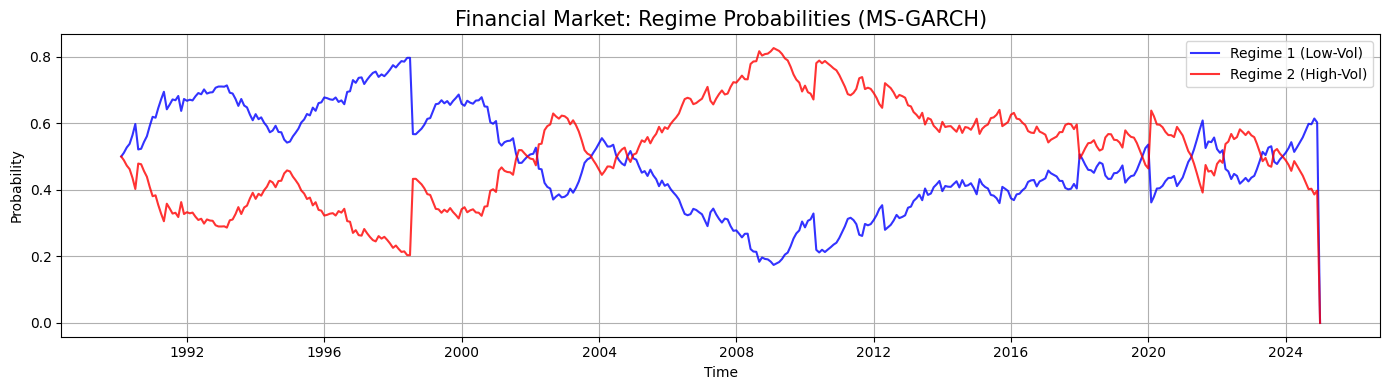

In [ ]:
# FINANCIAL MARKET: Plot filtered regime probabilities

import matplotlib.pyplot as plt

# Create a DataFrame for plotting
gamma_df = pd.DataFrame(gamma, columns=['Regime 1', 'Regime 2'])
gamma_df['Date'] = df.index[:T]
gamma_df.set_index('Date', inplace=True)

# Plot filtered probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma_df['Regime 1'], label='Regime 1 (Low-Vol)', color='blue', alpha=0.8)
plt.plot(gamma_df['Regime 2'], label='Regime 2 (High-Vol)', color='red', alpha=0.8)
plt.title("Financial Market: Regime Probabilities (MS-GARCH)", fontsize=15)
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

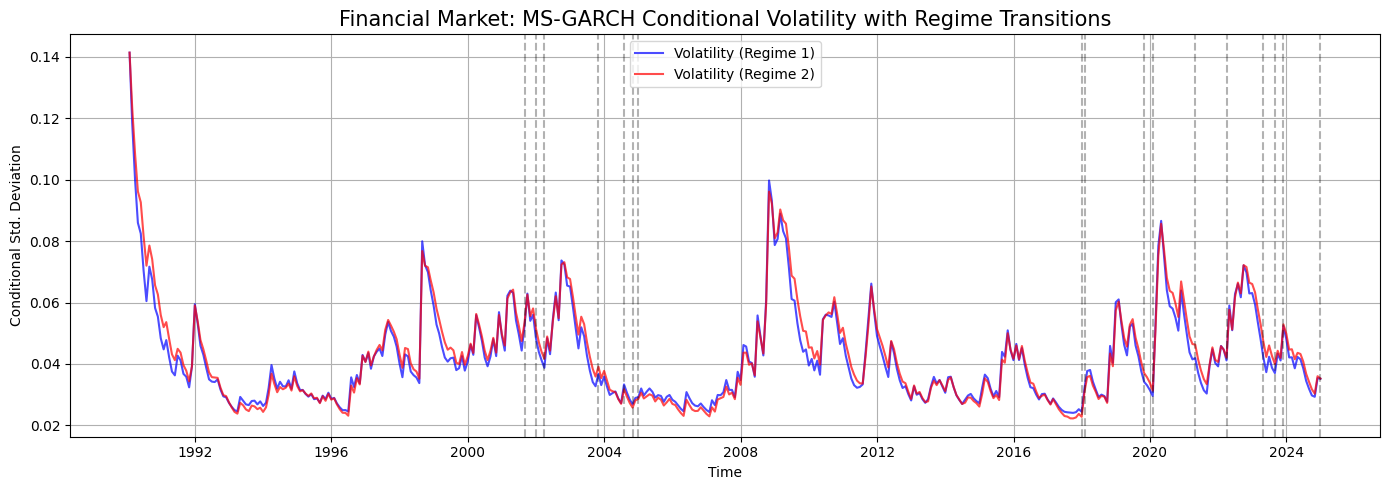

In [ ]:
# FINANCIAL MARKET: Volatility and Regime Annotation Plot

# Assign regime with maximum probability
most_likely_regime = np.argmax(gamma, axis=1)
regime_series = pd.Series(most_likely_regime, index=df.index[:T])

# Plot conditional volatility with regime colors
plt.figure(figsize=(14, 5))
plt.plot(df.index[:T], np.sqrt(sigma2[:, 0]), label='Volatility (Regime 1)', color='blue', alpha=0.7)
plt.plot(df.index[:T], np.sqrt(sigma2[:, 1]), label='Volatility (Regime 2)', color='red', alpha=0.7)

# Regime shading
for t in range(1, T):
    if regime_series.iloc[t] != regime_series.iloc[t-1]:
        plt.axvline(x=regime_series.index[t], color='black', linestyle='--', alpha=0.3)

plt.title("Financial Market: MS-GARCH Conditional Volatility with Regime Transitions", fontsize=15)
plt.ylabel("Conditional Std. Deviation")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Estimated MS-GARCH Summary Table

params_table = pd.DataFrame(params).T
params_table.columns = ['omega', 'alpha', 'beta', 'mu']
params_table.index = [f'Regime {i+1}' for i in range(k)]
params_table = params_table.round(4)

print("Financial Market: MS-GARCH Estimated Parameters (Regime-wise):")
display(params_table)

print("\nFinancial Market: Estimated Transition Probability Matrix (P):")
P_df = pd.DataFrame(P, columns=['To Regime 1', 'To Regime 2'], index=['From Regime 1', 'From Regime 2'])
display(P_df.round(4))

Financial Market: MS-GARCH Estimated Parameters (Regime-wise):


omega   alpha    beta      mu
Regime 1  0.0001  0.2018  0.7192  0.0099
Regime 2  0.0001  0.2236  0.7397  0.0080


Financial Market: Estimated Transition Probability Matrix (P):


To Regime 1  To Regime 2
From Regime 1       0.9999       0.0001
From Regime 2       0.0005       0.9995

**COMMODITY MARKET REGIME VOLATILITY (WITHOUT EXTERNAL SHOCKS):**

In [ ]:
# COMMODITY MARKET REGIME-VOLATILITY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Commodity Market Model
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])
df.set_index('date', inplace=True)
returns = df['oilr'].dropna().values  # Use crude oil returns
T = len(returns)

# Initialize regimes and parameters
k = 2  # Number of regimes
S = np.zeros((T, k))        # State probabilities
loglik = []                 # Log-likelihood trace
tol = 1e-5                  # Convergence tolerance
max_iter = 300              # Max EM iterations
np.random.seed(42)          # Reproducibility

# Transition matrix P initialization
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial GARCH parameters by regime: (omega, alpha, beta, mu)
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0},
    1: {'omega': 0.02, 'alpha': 0.2, 'beta': 0.7, 'mu': 0.0}
}

# Initial variances for each regime
sigma2 = np.full((T, k), 0.02)
gamma = np.full((T, k), 1/k)  # Initial state probability: uniform

print("Initialization complete.")

Initialization complete.


In [ ]:
# COMMODITY MARKET: Expected Maximization Algorithm for MS-GARCH(1,1)

from scipy.stats import norm
from scipy.optimize import minimize, Bounds

def garch_likelihood(params_vec, r, sigma2_init):
    omega, alpha, beta, mu = params_vec
    T = len(r)
    sigma2 = np.zeros(T)
    ll = 0.0
    sigma2[0] = sigma2_init

    for t in range(1, T):
        sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
        ll += np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t]

    return 0.5 * ll

def update_garch_params(r, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta, mu = params_vec
        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0
        for t in range(1, T):
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
            ll += gamma_col[t] * (np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t])
        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0], [1.0, 1.0, 1.0, 5.0])
    init = [0.01, 0.1, 0.85, 0.0]
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# Start EM Algorithm
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (returns[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s]

        # Compute conditional density for each regime
        likelihood = np.array([
            norm.pdf(returns[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        # Transition-weighted prediction
        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Compute total log-likelihood
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))  # Stability with epsilon

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Update GARCH Parameters
    gamma_sum = np.sum(gamma, axis=0)
    for s in range(k):
        p_opt = update_garch_params(returns, gamma[:, s], sigma2[0, s])
        params[s] = dict(zip(['omega', 'alpha', 'beta', 'mu'], p_opt))

    # M-STEP: Update Transition Matrix
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"EM algorithm converged at iteration {iteration} — Log-likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nCommodity Market: Final Estimated Parameters (Regime-wise):")
for s in range(k):
    print(f"Regime {s+1}: ω={params[s]['omega']:.4f}, α={params[s]['alpha']:.4f}, β={params[s]['beta']:.4f}, μ={params[s]['mu']:.4f}")

print("\nCommodity Market: Final Transition Matrix (P):")
print(np.round(P, 4))

EM algorithm converged at iteration 3 — Log-likelihood: 442.5316

Commodity Market: Final Estimated Parameters (Regime-wise):
Regime 1: ω=0.0036, α=0.4127, β=0.1683, μ=0.0082
Regime 2: ω=0.0000, α=0.0000, β=0.0000, μ=-0.0812

Commodity Market: Final Transition Matrix (P):
[[1. 0.]
 [0. 1.]]


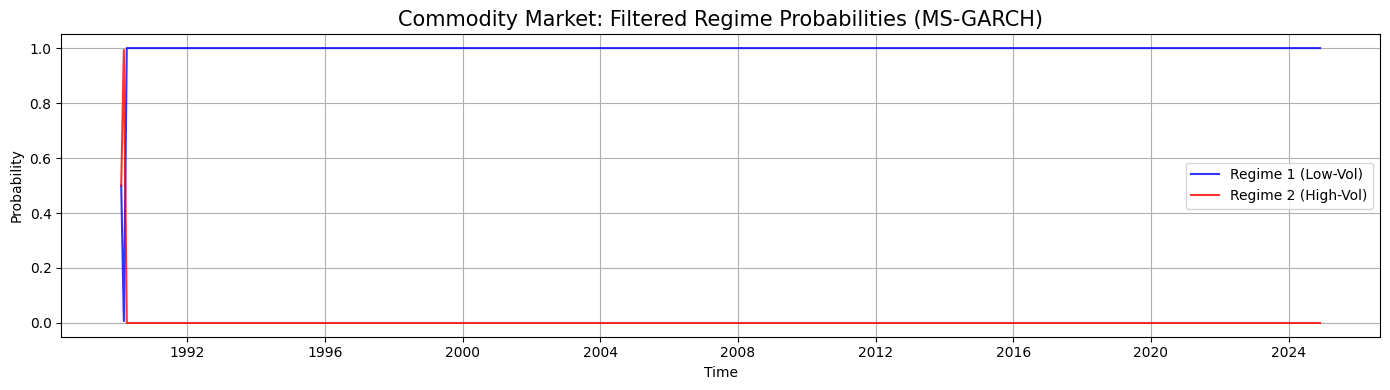

In [ ]:
# COMMODITY MARKET: Plot filtered regime probabilities

import matplotlib.pyplot as plt

# Create a DataFrame for plotting
gamma_df = pd.DataFrame(gamma, columns=['Regime 1', 'Regime 2'])
gamma_df['Date'] = df.index[:T]
gamma_df.set_index('Date', inplace=True)

# Plot filtered probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma_df['Regime 1'], label='Regime 1 (Low-Vol)', color='blue', alpha=0.8)
plt.plot(gamma_df['Regime 2'], label='Regime 2 (High-Vol)', color='red', alpha=0.8)
plt.title("Commodity Market: Filtered Regime Probabilities (MS-GARCH)", fontsize=15)
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

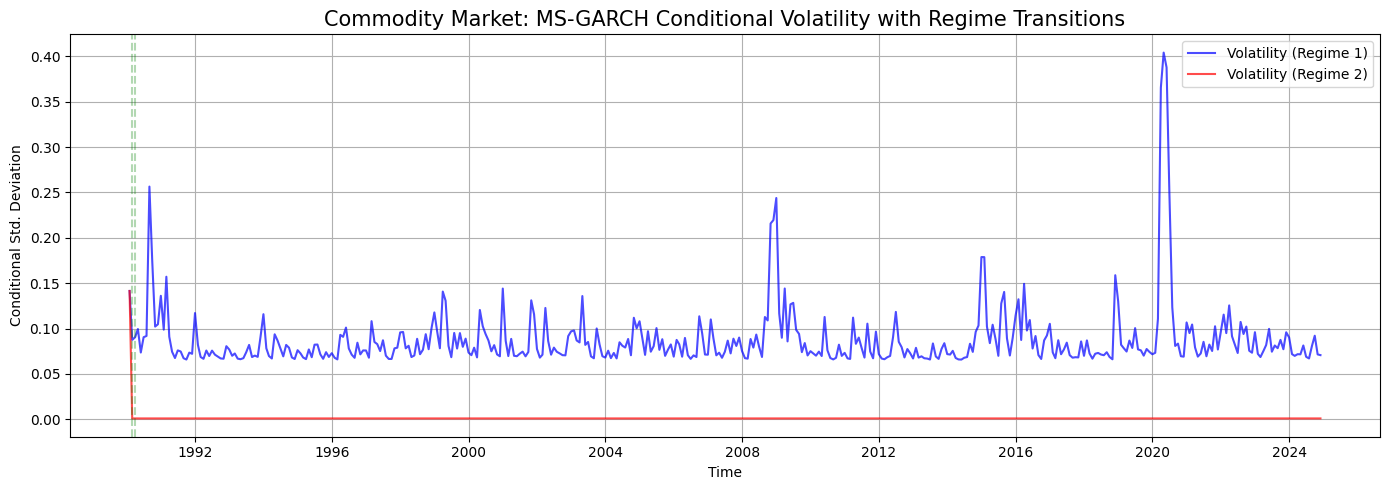

In [ ]:
# COMMODITY MARKET: Volatility and Regime Annotation Plot

# Assign regime with maximum probability
most_likely_regime = np.argmax(gamma, axis=1)
regime_series = pd.Series(most_likely_regime, index=df.index[:T])

# Plot conditional volatility with regime colors
plt.figure(figsize=(14, 5))
plt.plot(df.index[:T], np.sqrt(sigma2[:, 0]), label='Volatility (Regime 1)', color='blue', alpha=0.7)
plt.plot(df.index[:T], np.sqrt(sigma2[:, 1]), label='Volatility (Regime 2)', color='red', alpha=0.7)

# Regime shading
for t in range(1, T):
    if regime_series.iloc[t] != regime_series.iloc[t-1]:
        plt.axvline(x=regime_series.index[t], color='green', linestyle='--', alpha=0.3)

plt.title("Commodity Market: MS-GARCH Conditional Volatility with Regime Transitions", fontsize=15)
plt.ylabel("Conditional Std. Deviation")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Estimated MS-GARCH Summary Table

params_table = pd.DataFrame(params).T
params_table.columns = ['omega', 'alpha', 'beta', 'mu']
params_table.index = [f'Regime {i+1}' for i in range(k)]
params_table = params_table.round(4)

print("Commodity Market: MS-GARCH Estimated Parameters (Regime-wise):")
display(params_table)

print("\nCommodity Market: Estimated Transition Probability Matrix (P):")
P_df = pd.DataFrame(P, columns=['To Regime 1', 'To Regime 2'], index=['From Regime 1', 'From Regime 2'])
display(P_df.round(4))

Commodity Market: MS-GARCH Estimated Parameters (Regime-wise):


omega   alpha    beta      mu
Regime 1  0.0036  0.4127  0.1683  0.0082
Regime 2  0.0000  0.0000  0.0000 -0.0812


Commodity Market: Estimated Transition Probability Matrix (P):


To Regime 1  To Regime 2
From Regime 1          1.0          0.0
From Regime 2          0.0          1.0

**ESTIMATION MODEL FOR HYPOTHESIS 1: MARKOV SWITCHING REGRESSION**

*Here, we examine the effects of geopolitical risk, trade war uncertainty, and environmental shocks on financial and commodity markets across different market regimes using a Markov Switching Regression framework. Furthermore, in order to check volatility clustering in the presence of such shocks, we employ a Markov Switching GARCH (MS-GARCH) model. The double-regime analysis separates the manner in which shocks impact market returns and volatility during normal times versus times of crisis.*

In [ ]:
# MARKOV SWITCHING REGRESSION FOR FINANCIAL AND COMMODITY MARKETS

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import numpy as np
import pandas as pd

# Optional: Set inferred frequency
df.index.freq = pd.infer_freq(df.index)

# Define a function to run MS Regression for any dependent variable
def run_msr_model(y_col, X_cols):
    y = df[y_col].dropna()
    X = df[X_cols].dropna()
    common_idx = y.index.intersection(X.index)
    y = y.loc[common_idx]
    X = X.loc[common_idx]

    model = MarkovRegression(endog=y, exog=X, k_regimes=2, trend='c', switching_variance=True)
    result = model.fit(maxiter=1000, disp=False)

    # Extract coefficients by index
    n_exog = X.shape[1]
    param_names = ['Intercept'] + list(X.columns)
    regime_1_coefs = []
    regime_2_coefs = []

    regime_1_coefs.append(result.params.iloc[0])  # Regime 1
    regime_2_coefs.append(result.params.iloc[1])  # Regime 2

    for i in range(n_exog):
        regime_1_coefs.append(result.params.iloc[2 + i * 2])
        regime_2_coefs.append(result.params.iloc[2 + i * 2 + 1])

    coef_table = pd.DataFrame({
        "Regime 1 (Stable)": regime_1_coefs,
        "Regime 2 (Crisis)": regime_2_coefs
    }, index=param_names).round(5)

    return coef_table

**IMPACT OF GPR, TRADE WAR, AND ENVIRONMENTAL SHOCKS ON GLOBAL FINANCIAL MARKET ACROSS STABLE AND CRISIS REGIMES:**

In [ ]:
# Model 1: Impact of Uncertainty Indexes on the Global Financial Market (SP500)
sp500_result = run_msr_model('sp500r', ['gpr', 'twar', 'env'])
print("SP500R ~ GPR + TWAR + ENV (Regime-dependent):")
sp500_result

SP500R ~ GPR + TWAR + ENV (Regime-dependent):


Regime 1 (Stable)  Regime 2 (Crisis)
Intercept            0.89593            0.42606
gpr                 -3.08172           -3.78728
twar               178.11286         -441.17913
env               -587.70930         -304.11472

**IMPACT OF GPR, TRADE WAR, AND ENVIRONMENTAL SHOCKS ON GLOBAL COMMODITY MARKET ACROSS STABLE AND CRISIS REGIMES:**

In [ ]:
# Model 2: Impact of Uncertainty Indexes on the Global Commodity Market (OIL)
oil_result = run_msr_model('oilr', ['gpr', 'twar', 'env'])
print("\nOILR ~ GPR + TWAR + ENV (Regime-dependent):")
oil_result


OILR ~ GPR + TWAR + ENV (Regime-dependent):


Regime 1 (Stable)  Regime 2 (Crisis)
Intercept            0.70588            0.40141
gpr                  7.44173           -2.89070
twar               759.08630         -306.85976
env                152.65362         -128.23094

**ESTIMATION MODEL FOR HYPOTHESIS 1 (VOLATILITY CLUSTERING): M-S GARCH**

**SHOCKS IN GPR, TRADE WAR, AND ENVIRONMENT TO GLOBAL FINANCIAL MARKET VOLATILITY ACROSS REGIMES:**

In [ ]:
# MS-GARCH MODEL FOR QUANTIFYING THE IMPACT OF GPR, TRADE WAR, AND ENVIRONMENTAL SHOCK ON THE GLOBAL FINANCIAL MARKET

# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize, Bounds
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Target: Financial Market
r = df['sp500r'].dropna()
X_raw = df[["gpr", "twar", "env"]].dropna()

# Align and standardize shocks
common_idx = r.index.intersection(X_raw.index)
r = r.loc[common_idx].values
X = X_raw.loc[common_idx].values
X = StandardScaler().fit_transform(X) * 10

T = len(r)
k = 2
m = X.shape[1]

# GARCH PARAMETERS per regime
fixed_params = {
    0: {'omega': 0.005, 'alpha': 0.05, 'beta': 0.93},   # Stable regime
    1: {'omega': 0.03,  'alpha': 0.25, 'beta': 0.65}    # Crisis regime
}

# ESTIMATED PARAMETERS
params = {
    0: {'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},
    1: {'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])}
}

# Transition matrix
P = np.array([[0.96, 0.04],
              [0.04, 0.96]])

# Initialize
gamma = np.full((T, k), 1 / k)
sigma2 = np.full((T, k), 0.02)
loglik = []
max_iter = 200
tol = 1e-5

# Optimization: estimate mu, delta (ω, α, β)
def update_mu_delta(r, X, gamma_col, sigma2_init, fixed_garch):
    def nll(params_vec):
        mu = params_vec[0]
        delta = params_vec[1:]
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        for t in range(1, T):
            x_term = np.dot(delta, X[t])
            sigma2[t] = fixed_garch['omega'] + fixed_garch['alpha'] * (r[t-1] - mu)**2 + fixed_garch['beta'] * sigma2[t-1] + x_term
            sigma2[t] = max(sigma2[t], 1e-6)
        ll = 0.5 * np.sum(gamma_col[1:] * (np.log(2 * np.pi * sigma2[1:]) + ((r[1:] - mu)**2) / sigma2[1:]))
        return ll

    bounds = Bounds([-5.0] + [-2.0]*m, [5.0] + [2.0]*m)
    init = [0.0] + list(0.01 * np.random.randn(m))
    result = minimize(nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# EM Algorithm
for iteration in range(max_iter):
    # E-step
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            delta_s = params[s]['delta']
            g = fixed_params[s]
            x_term = np.dot(delta_s, X[t])
            sigma2[t, s] = g['omega'] + g['alpha'] * (r[t-1] - mu_s)**2 + g['beta'] * sigma2[t-1, s] + x_term
            sigma2[t, s] = max(sigma2[t, s], 1e-6)

        likelihood = np.array([
            norm.pdf(r[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])
        weights = P.T @ gamma[t-1]
        gamma[t] = (likelihood * weights) / (np.sum(likelihood * weights) + 1e-12)

    # Log-likelihood
    ll_terms = []
    for t in range(1, T):
        p_sum = sum(gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                    for i in range(k) for j in range(k))
        ll_terms.append(np.log(p_sum + 1e-12))
    loglik.append(np.sum(ll_terms))

    # M-step: update mu and delta
    for s in range(k):
        opt = update_mu_delta(r, X, gamma[:, s], sigma2[0, s], fixed_params[s])
        params[s]['mu'] = opt[0]
        params[s]['delta'] = np.array(opt[1:])

    # Convergence
    if iteration > 3 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"\nFinancial Market: EM Converged at Iteration {iteration} | Log-Likelihood: {loglik[-1]:.5f}")
        break

# Final Output
print("\nFINANCIAL MARKET: FINAL ESTIMATED PARAMETERS (SP500R - VOLATILITY):")
for s in range(k):
    print(f"\nRegime {s+1} (Volatility State):")
    g = fixed_params[s]
    print(f"ω={g['omega']:.5f}, α={g['alpha']:.5f}, β={g['beta']:.5f}")
    print(f"μ={params[s]['mu']:.5f}")
    print(f"δ Coefficients [GPR, TWAR, ENV]: {np.round(params[s]['delta'], 5)}")

print("\nFINANCIAL MARKET: FINAL TRANSITION MATRIX (P):")
print(np.round(P, 4))


FINANCIAL MARKET: FINAL ESTIMATED PARAMETERS (SP500R - VOLATILITY):

Regime 1 (Volatility State):
ω=0.00500, α=0.05000, β=0.93000
μ=0.00930
δ Coefficients [GPR, TWAR, ENV]: [ 0.00042  0.0004  -0.00025]

Regime 2 (Volatility State):
ω=0.03000, α=0.25000, β=0.65000
μ=0.00253
δ Coefficients [GPR, TWAR, ENV]: [0.00585 0.00232 0.01278]

FINANCIAL MARKET: FINAL TRANSITION MATRIX (P):
[[0.96 0.04]
 [0.04 0.96]]


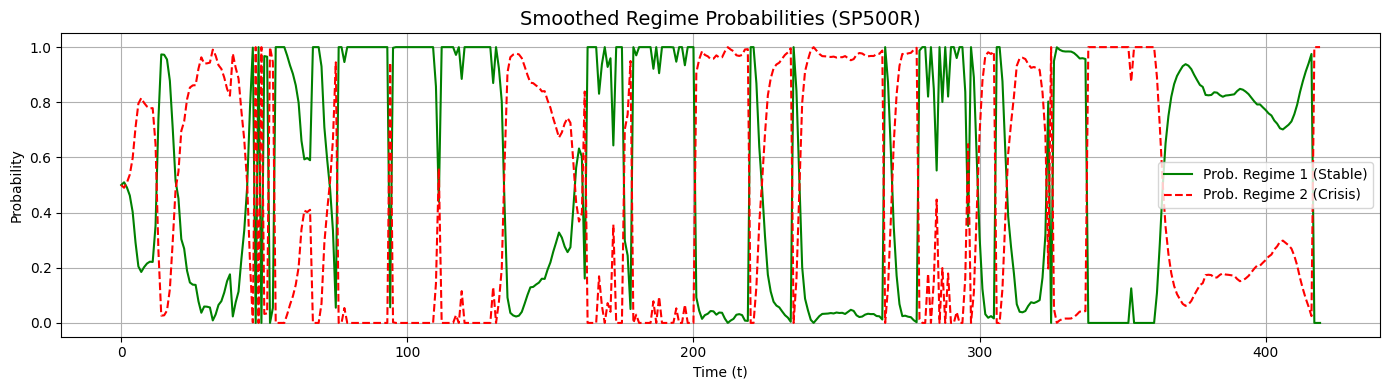

In [ ]:
# FINANCIAL MARKET MODEL: DIAGNOSTICS AND VISUALIZATION

import matplotlib.pyplot as plt

# 1. Regime probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma[:, 0], label="Prob. Regime 1 (Stable)", color='green')
plt.plot(gamma[:, 1], label="Prob. Regime 2 (Crisis)", color='red', linestyle='--')
plt.title("Smoothed Regime Probabilities (SP500R)", fontsize=14)
plt.xlabel("Time (t)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

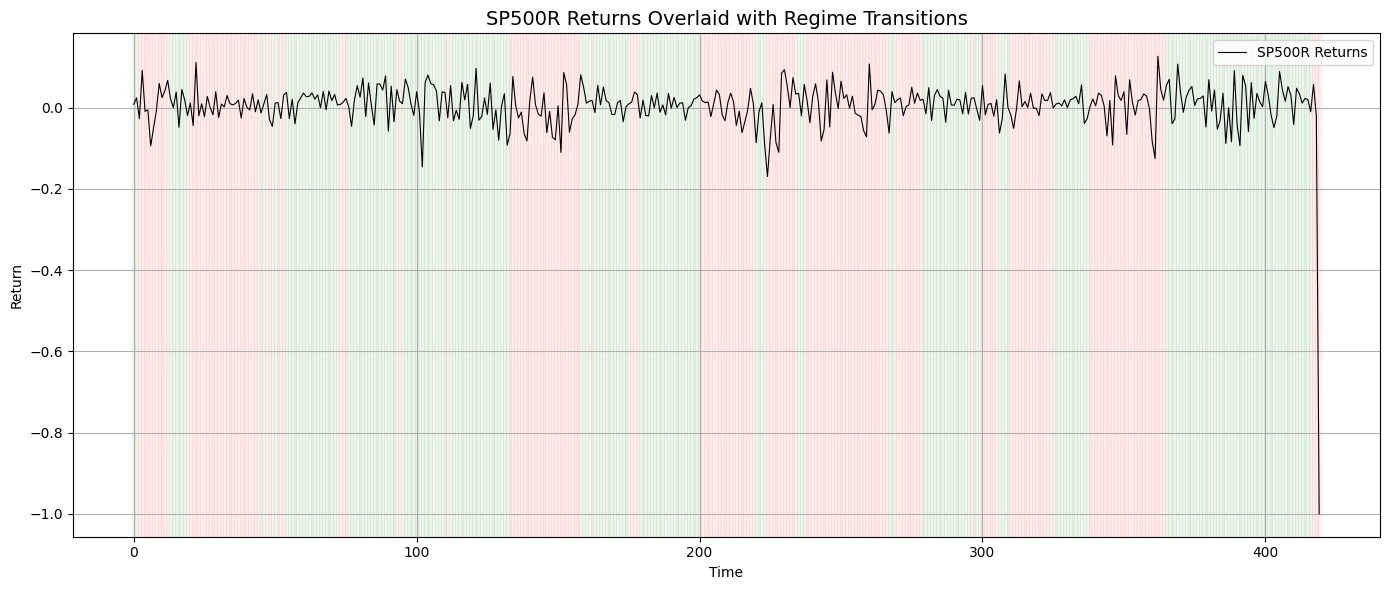

In [ ]:
# Returns + Conditional Volatility + Regimes
most_likely_regime = np.argmax(gamma, axis=1)
colors = ['green' if state == 0 else 'red' for state in most_likely_regime]

plt.figure(figsize=(14, 6))
plt.plot(r, label="SP500R Returns", color='black', linewidth=0.8)
plt.title("SP500R Returns Overlaid with Regime Transitions", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Return")

# Overlay background shading by regime
for t in range(len(r)):
    plt.axvspan(t-0.5, t+0.5, color=colors[t], alpha=0.05)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

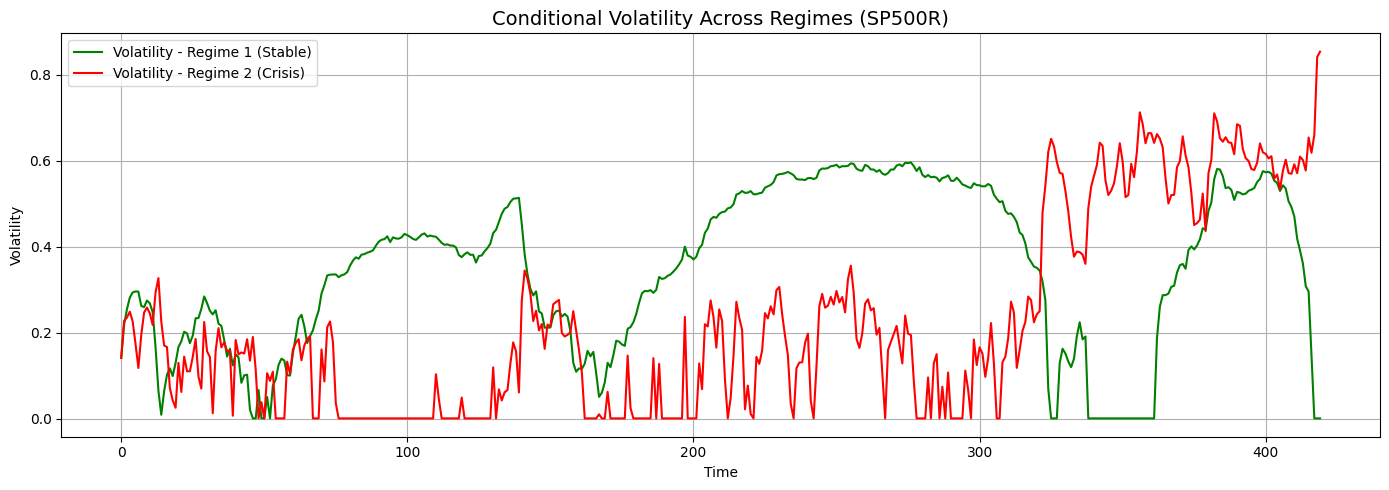

In [ ]:
# Conditional Volatility Plot
vol_stable = np.sqrt(sigma2[:, 0])
vol_crisis = np.sqrt(sigma2[:, 1])
plt.figure(figsize=(14, 5))
plt.plot(vol_stable, label='Volatility - Regime 1 (Stable)', color='green')
plt.plot(vol_crisis, label='Volatility - Regime 2 (Crisis)', color='red')
plt.title("Conditional Volatility Across Regimes (SP500R)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

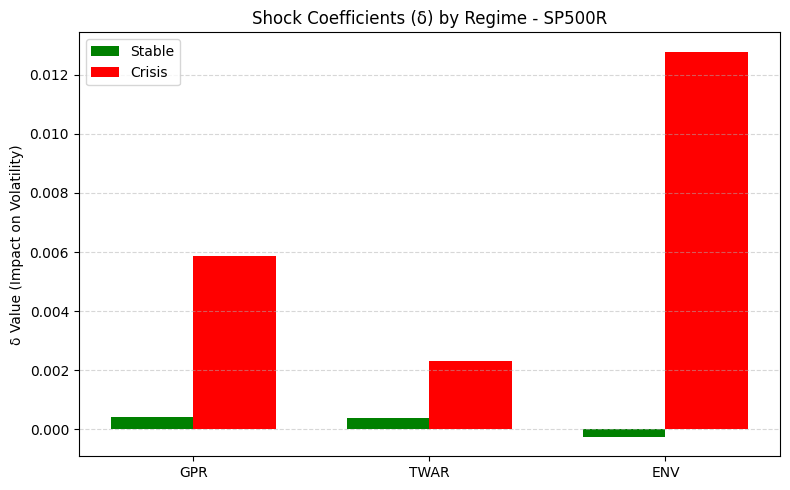

In [ ]:
# Shock Coefficients Bar Chart
regime_labels = ['Stable', 'Crisis']
shock_labels = ['GPR', 'TWAR', 'ENV']
delta_values = np.vstack([params[0]['delta'], params[1]['delta']])

bar_width = 0.35
index = np.arange(len(shock_labels))

plt.figure(figsize=(8, 5))
plt.bar(index, delta_values[0], bar_width, label='Stable', color='green')
plt.bar(index + bar_width, delta_values[1], bar_width, label='Crisis', color='red')
plt.xticks(index + bar_width / 2, shock_labels)
plt.title("Shock Coefficients (δ) by Regime - SP500R")
plt.ylabel("δ Value (Impact on Volatility)")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

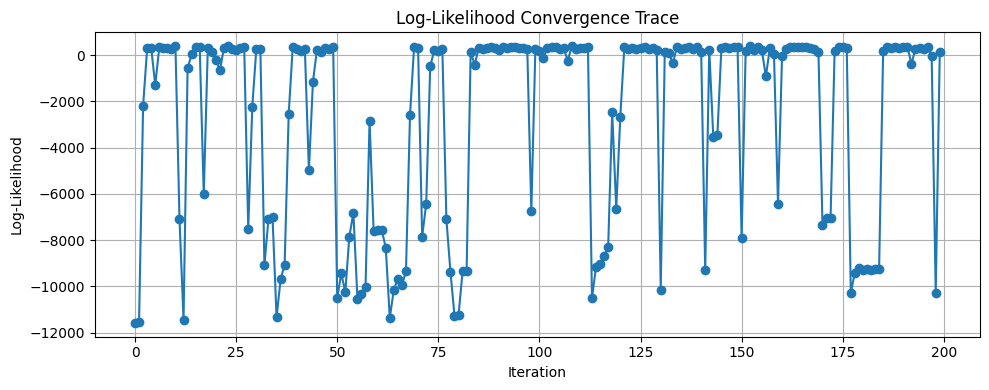

In [ ]:
# Log-Likelihood trace
plt.figure(figsize=(10, 4))
plt.plot(loglik, marker='o')
plt.title("Log-Likelihood Convergence Trace")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Summary Table
summary_data = {
    "Regime": ["Stable", "Crisis"],
    "ω": [fixed_params[0]['omega'], fixed_params[1]['omega']],
    "α": [fixed_params[0]['alpha'], fixed_params[1]['alpha']],
    "β": [fixed_params[0]['beta'], fixed_params[1]['beta']],
    "μ": [params[0]['mu'], params[1]['mu']],
    "δ_GPR": [params[0]['delta'][0], params[1]['delta'][0]],
    "δ_TWAR": [params[0]['delta'][1], params[1]['delta'][1]],
    "δ_ENV": [params[0]['delta'][2], params[1]['delta'][2]]
}
summary_table = pd.DataFrame(summary_data).round(5)
print("\nSP500R Regime-wise Parameter Summary:")
display(summary_table)


SP500R Regime-wise Parameter Summary:


Regime      ω     α     β        μ    δ_GPR   δ_TWAR    δ_ENV
0  Stable  0.005  0.05  0.93  0.00930  0.00042  0.00040 -0.00025
1  Crisis  0.030  0.25  0.65  0.00253  0.00585  0.00232  0.01278

**SHOCKS IN GPR, TRADE WAR, AND ENVIRONMENT TO GLOBAL COMMODITY MARKET VOLATILITY ACROSS REGIMES:**

In [ ]:
# MS-GARCH MODEL FOR QUANTIFYING THE IMPACT OF GPR, TRADE WAR, AND ENVIRONMENTAL SHOCK ON THE GLOBAL COMMODITY MARKET

# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize, Bounds
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Target: Commodity Market
r = df['oilr'].dropna()
X_raw = df[["gpr", "twar", "env"]].dropna()

# Align and standardize shocks
common_idx = r.index.intersection(X_raw.index)
r = r.loc[common_idx].values
X = X_raw.loc[common_idx].values
X = StandardScaler().fit_transform(X) * 10

T = len(r)
k = 2
m = X.shape[1]

# GARCH PARAMETERS per regime
fixed_params = {
    0: {'omega': 0.005, 'alpha': 0.05, 'beta': 0.93},   # Stable regime
    1: {'omega': 0.03,  'alpha': 0.25, 'beta': 0.65}    # Crisis regime
}

# ESTIMATED PARAMETERS
params = {
    0: {'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},
    1: {'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])}
}

# Transition matrix
P = np.array([[0.96, 0.04],
              [0.04, 0.96]])

# Initialize
gamma = np.full((T, k), 1 / k)
sigma2 = np.full((T, k), 0.02)
loglik = []
max_iter = 200
tol = 1e-5

# Optimization: estimate mu, delta (ω, α, β)
def update_mu_delta(r, X, gamma_col, sigma2_init, fixed_garch):
    def nll(params_vec):
        mu = params_vec[0]
        delta = params_vec[1:]
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        for t in range(1, T):
            x_term = np.dot(delta, X[t])
            sigma2[t] = fixed_garch['omega'] + fixed_garch['alpha'] * (r[t-1] - mu)**2 + fixed_garch['beta'] * sigma2[t-1] + x_term
            sigma2[t] = max(sigma2[t], 1e-6)
        ll = 0.5 * np.sum(gamma_col[1:] * (np.log(2 * np.pi * sigma2[1:]) + ((r[1:] - mu)**2) / sigma2[1:]))
        return ll

    bounds = Bounds([-5.0] + [-2.0]*m, [5.0] + [2.0]*m)
    init = [0.0] + list(0.01 * np.random.randn(m))
    result = minimize(nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# EM Algorithm
for iteration in range(max_iter):
    # E-step
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            delta_s = params[s]['delta']
            g = fixed_params[s]
            x_term = np.dot(delta_s, X[t])
            sigma2[t, s] = g['omega'] + g['alpha'] * (r[t-1] - mu_s)**2 + g['beta'] * sigma2[t-1, s] + x_term
            sigma2[t, s] = max(sigma2[t, s], 1e-6)

        likelihood = np.array([
            norm.pdf(r[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])
        weights = P.T @ gamma[t-1]
        gamma[t] = (likelihood * weights) / (np.sum(likelihood * weights) + 1e-12)

    # Log-likelihood
    ll_terms = []
    for t in range(1, T):
        p_sum = sum(gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                    for i in range(k) for j in range(k))
        ll_terms.append(np.log(p_sum + 1e-12))
    loglik.append(np.sum(ll_terms))

    # M-step: update mu and delta
    for s in range(k):
        opt = update_mu_delta(r, X, gamma[:, s], sigma2[0, s], fixed_params[s])
        params[s]['mu'] = opt[0]
        params[s]['delta'] = np.array(opt[1:])

    # Convergence
    if iteration > 3 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"\nCommodity Market: EM Converged at Iteration {iteration} | Log-Likelihood: {loglik[-1]:.5f}")
        break

# Final Output
print("\nCOMMODITY MARKET: FINAL ESTIMATED PARAMETERS (OILR - VOLATILITY):")
for s in range(k):
    print(f"\nRegime {s+1} (Volatility State):")
    g = fixed_params[s]
    print(f"ω={g['omega']:.5f}, α={g['alpha']:.5f}, β={g['beta']:.5f}")
    print(f"μ={params[s]['mu']:.5f}")
    print(f"δ Coefficients [GPR, TWAR, ENV]: {np.round(params[s]['delta'], 5)}")

print("\nCOMMODITY MARKET: FINAL TRANSITION MATRIX (P):")
print(np.round(P, 4))


COMMODITY MARKET: FINAL ESTIMATED PARAMETERS (OILR - VOLATILITY):

Regime 1 (Volatility State):
ω=0.00500, α=0.05000, β=0.93000
μ=0.01137
δ Coefficients [GPR, TWAR, ENV]: [-0.00011 -0.00046  0.00088]

Regime 2 (Volatility State):
ω=0.03000, α=0.25000, β=0.65000
μ=0.01345
δ Coefficients [GPR, TWAR, ENV]: [ 3.00e-05  5.46e-03 -1.02e-03]

COMMODITY MARKET: FINAL TRANSITION MATRIX (P):
[[0.96 0.04]
 [0.04 0.96]]


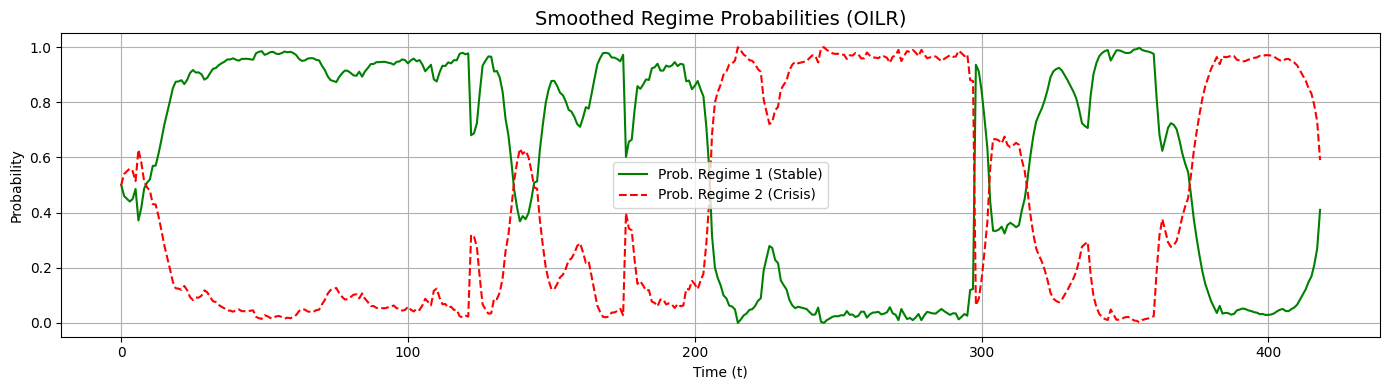

In [ ]:
# Commodity Market: Regime probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma[:, 0], label="Prob. Regime 1 (Stable)", color='green')
plt.plot(gamma[:, 1], label="Prob. Regime 2 (Crisis)", color='red', linestyle='--')
plt.title("Smoothed Regime Probabilities (OILR)", fontsize=14)
plt.xlabel("Time (t)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

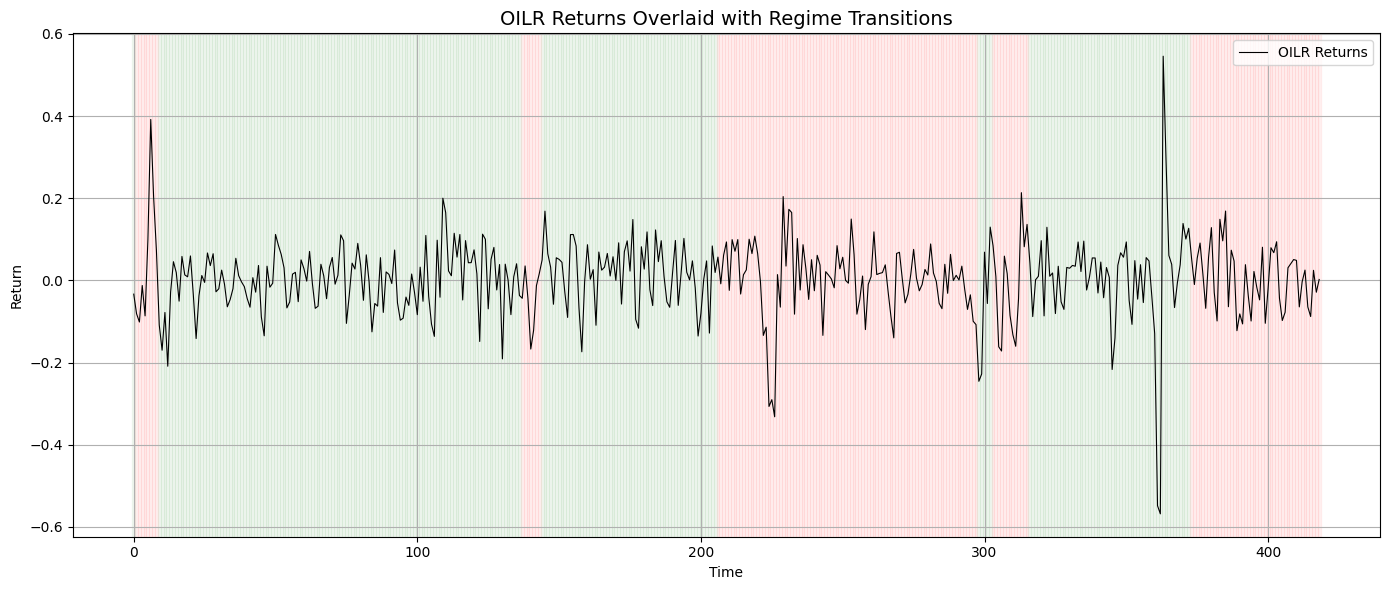

In [ ]:
# Commodity Market: Oil returns with background regime
most_likely_regime = np.argmax(gamma, axis=1)
colors = ['green' if state == 0 else 'red' for state in most_likely_regime]

plt.figure(figsize=(14, 6))
plt.plot(r, label="OILR Returns", color='black', linewidth=0.8)
plt.title("OILR Returns Overlaid with Regime Transitions", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Return")

# Shade background by regime
for t in range(len(r)):
    plt.axvspan(t - 0.5, t + 0.5, color=colors[t], alpha=0.05)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

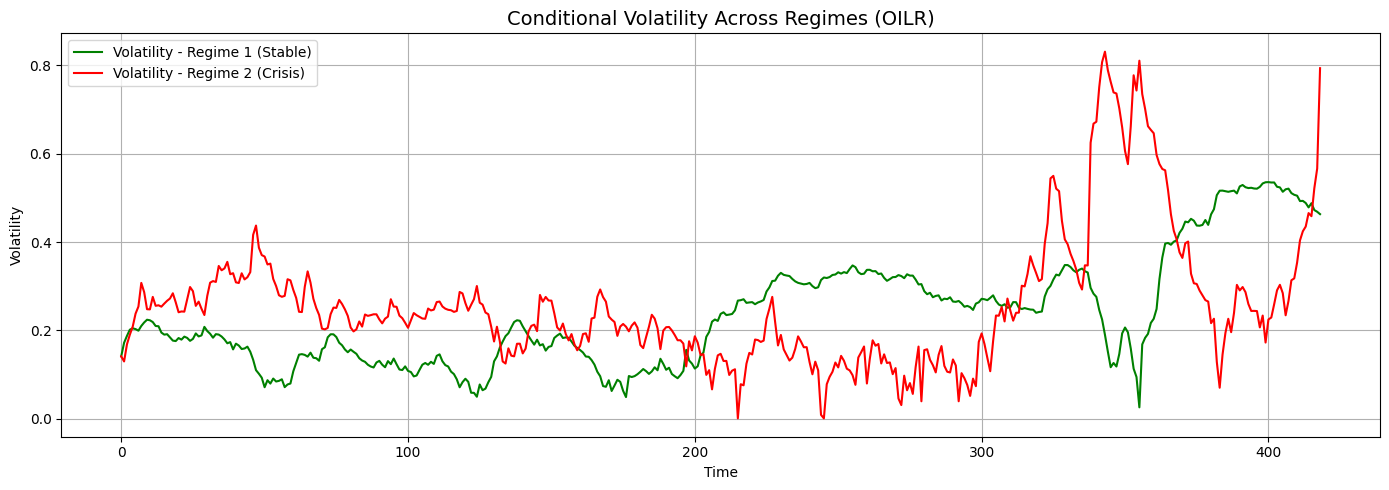

In [ ]:
# Commodity Market: Conditional volatility plot
vol_stable = np.sqrt(sigma2[:, 0])
vol_crisis = np.sqrt(sigma2[:, 1])
plt.figure(figsize=(14, 5))
plt.plot(vol_stable, label='Volatility - Regime 1 (Stable)', color='green')
plt.plot(vol_crisis, label='Volatility - Regime 2 (Crisis)', color='red')
plt.title("Conditional Volatility Across Regimes (OILR)", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

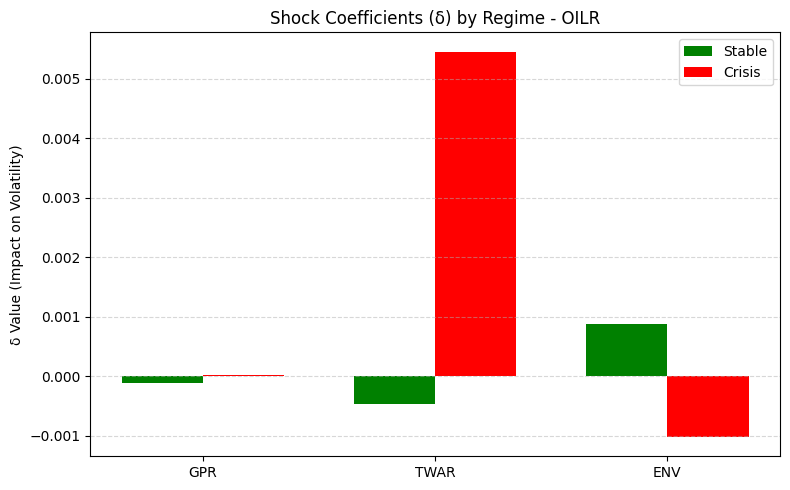

In [ ]:
# Commodity MArket: Shock impact bar chart
regime_labels = ['Stable', 'Crisis']
shock_labels = ['GPR', 'TWAR', 'ENV']
delta_values = np.vstack([params[0]['delta'], params[1]['delta']])

bar_width = 0.35
index = np.arange(len(shock_labels))

plt.figure(figsize=(8, 5))
plt.bar(index, delta_values[0], bar_width, label='Stable', color='green')
plt.bar(index + bar_width, delta_values[1], bar_width, label='Crisis', color='red')
plt.xticks(index + bar_width / 2, shock_labels)
plt.title("Shock Coefficients (δ) by Regime - OILR")
plt.ylabel("δ Value (Impact on Volatility)")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

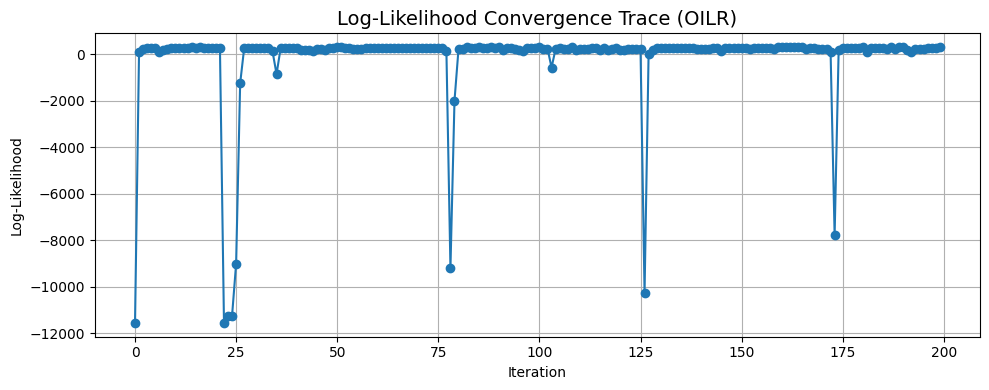

In [ ]:
# Commodity Market: Log-likelihood convergence trace
plt.figure(figsize=(10, 4))
plt.plot(loglik, marker='o')
plt.title("Log-Likelihood Convergence Trace (OILR)", fontsize=14)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Commodity Market: Summary table of estimated parameters
summary_data = {
    "Regime": ["Stable", "Crisis"],
    "ω": [fixed_params[0]['omega'], fixed_params[1]['omega']],
    "α": [fixed_params[0]['alpha'], fixed_params[1]['alpha']],
    "β": [fixed_params[0]['beta'], fixed_params[1]['beta']],
    "μ": [params[0]['mu'], params[1]['mu']],
    "δ_GPR": [params[0]['delta'][0], params[1]['delta'][0]],
    "δ_TWAR": [params[0]['delta'][1], params[1]['delta'][1]],
    "δ_ENV": [params[0]['delta'][2], params[1]['delta'][2]]
}
summary_table = pd.DataFrame(summary_data).round(5)
print("\nCommodity Market: OILR Regime-wise Parameter Summary:")
display(summary_table)


Commodity Market: OILR Regime-wise Parameter Summary:


Regime      ω     α     β        μ    δ_GPR   δ_TWAR    δ_ENV
0  Stable  0.005  0.05  0.93  0.01137 -0.00011 -0.00046  0.00088
1  Crisis  0.030  0.25  0.65  0.01345  0.00003  0.00546 -0.00102

#**ESTIMATION MODEL FOR HYPOTHESIS 2A: DCC-GARCH:**

*This section focuses on examining the dynamic relationship between the commodity and financial markets. To this end, time-varying correlation between the two markets is modeled using the DCC-GARCH to begin with. Secondly, the Diebold-Yilmaz (D-Y) Spillover Index is utilized to examine the direction and magnitude of information and volatility spillovers, with and without rolling windows. This way, potentially, fine patterns of interdependence between the markets and how they evolve over time are captured.*

**DYNAMIC CORRELATION BETWEEN GLOBAL FINANCIAL MARKET AND COMMODITY MARKET:**

In [ ]:
# DCC-GARCH FOR THE GLOBAL FINANCIAL AND COMMODITY MARKET

#Import libraries
import numpy as np
import pandas as pd
from arch.univariate import ConstantMean, GARCH
from arch.__future__ import reindexing
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load and align return data
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

returns_df = df[['sp500r', 'oilr']].dropna()
returns_df.columns = ['SP500R', 'OILR']
returns = returns_df.values.T  # shape: (2, T)

T = returns.shape[1]

# Fit univariate GARCH(1,1) models
resids = []
sigmas = []

for i in range(2):
    model = ConstantMean(returns[i])
    model.volatility = GARCH(1, 0, 1)
    model.fit(disp="off")
    res = model.fit(update_freq=0, disp="off")
    resids.append(res.resid / res.conditional_volatility)
    sigmas.append(res.conditional_volatility)

resids = np.array(resids)
sigmas = np.array(sigmas)

In [ ]:
# DCC-GARCH estimation (Engle, 2002)
def dcc_loglik(params):
    a, b = params
    T = resids.shape[1]
    Qbar = np.cov(resids)
    Q = Qbar.copy()
    loglik = 0.0

    for t in range(1, T):
        et_1 = resids[:, t - 1].reshape(-1, 1)
        Q = (1 - a - b) * Qbar + a * et_1 @ et_1.T + b * Q

        diag_q = np.diag(1 / np.sqrt(np.diag(Q)))
        R = diag_q @ Q @ diag_q
        detR = np.linalg.det(R)
        invR = np.linalg.inv(R)

        loglik += np.log(detR) + resids[:, t].T @ invR @ resids[:, t]

    return 0.5 * loglik

In [ ]:
# Optimize DCC parameters (a, b)
bounds = [(1e-6, 1 - 1e-6), (1e-6, 1 - 1e-6)]
initial = [0.01, 0.95]
result = minimize(dcc_loglik, initial, method='L-BFGS-B', bounds=bounds)
a_opt, b_opt = result.x
print(f"\nDCC-GARCH Parameters: a={a_opt:.5f}, b={b_opt:.5f}")


DCC-GARCH Parameters: a=0.01000, b=0.95000


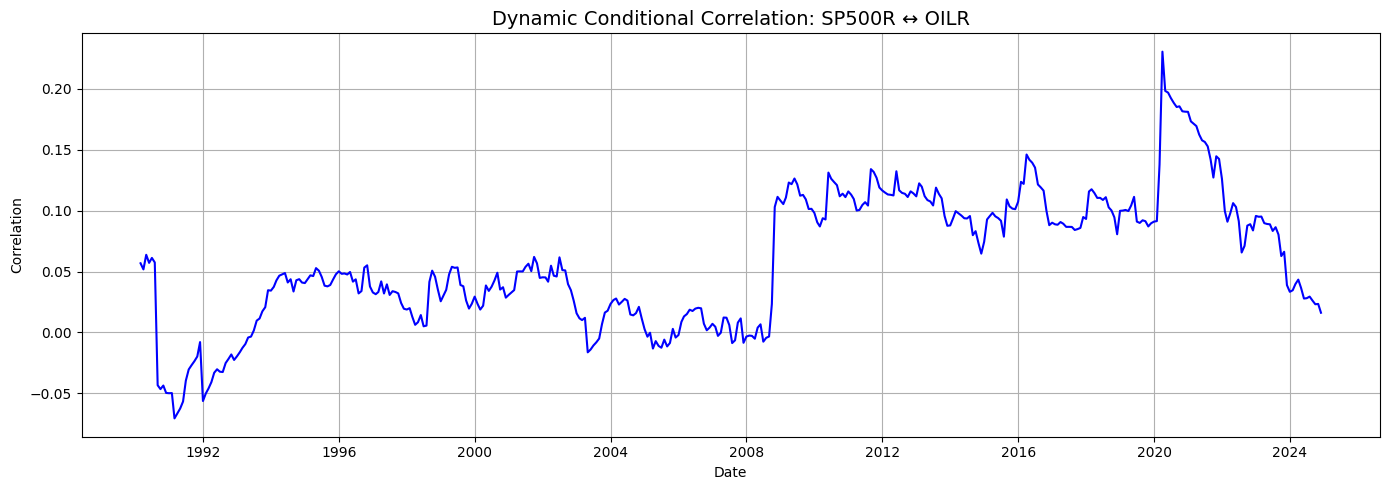

In [ ]:
# Construct dynamic correlation matrix R_t
Qbar = np.cov(resids)
Q = Qbar.copy()
R_ts = []

for t in range(1, T):
    et_1 = resids[:, t - 1].reshape(-1, 1)
    Q = (1 - a_opt - b_opt) * Qbar + a_opt * et_1 @ et_1.T + b_opt * Q
    diag_q = np.diag(1 / np.sqrt(np.diag(Q)))
    R_t = diag_q @ Q @ diag_q
    R_ts.append(R_t[0, 1])  # Store dynamic correlation SP500R ↔ OILR

# Plot dynamic correlation over time
plt.figure(figsize=(14, 5))
plt.plot(returns_df.index[1:], R_ts, color='blue', linewidth=1.5)
plt.title("Dynamic Conditional Correlation: SP500R ↔ OILR", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# DCC-GARCH Summary Table
dcc_summary = {
    'Parameter': ['DCC α', 'DCC β', 'ρ_min', 'ρ_max', 'ρ_mean', 'ρ_std'],
    'Estimate': [
        round(a_opt, 5),
        round(b_opt, 5),
        round(np.min(R_ts), 5),
        round(np.max(R_ts), 5),
        round(np.mean(R_ts), 5),
        round(np.std(R_ts), 5)
    ]
}
dcc_table = pd.DataFrame(dcc_summary)
print("\nDCC-GARCH Summary Table (SP500R ↔ OILR):")
display(dcc_table)


DCC-GARCH Summary Table (SP500R ↔ OILR):


Parameter  Estimate
0     DCC α   0.01000
1     DCC β   0.95000
2     ρ_min  -0.07053
3     ρ_max   0.23056
4    ρ_mean   0.05822
5     ρ_std   0.05415

#**ESTIMATION MODEL FOR HYPOTHESIS 2B: D-Y SPILLOVER INDEX**

**DYNAMIC SPILLOVER BETWEEN GLOBAL FINANCIAL AND COMMODITY MARKETS (WITHOUT EXTERNAL SHOCKS AND ROLLING WINDOWS):**

In [ ]:
# Dielbold-Yilmaz Spillover Index for the Global Financial and Commodity Markets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load data
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Select returns for VAR
data = df[['sp500r', 'oilr']].dropna()

# Estimate VAR(p) model
maxlags = 12  # Max lag length
var_model = VAR(data)
lag_order_results = var_model.select_order(maxlags)
p = lag_order_results.aic  #

print(f"Selected lag order p = {p}")

var_res = var_model.fit(p)

# Horizon for forecast error variance decomposition
horizon = 10

# Get MA matrices up to horizon
ma_matrices = var_res.ma_rep(maxn=horizon)

# Compute GFEVD matrix

k = data.shape[1]
sigma_u = var_res.sigma_u.values
gfevd = np.zeros((k, k))

for i in range(k):
    for j in range(k):
        num = 0.0
        denom = 0.0
        for h in range(horizon):
            theta_h = ma_matrices[h]
            # Contribution of shock j to variable i
            num += (theta_h[i, j] ** 2) * sigma_u[j, j]
            # Total forecast error variance for variable i
            denom += sum([(theta_h[i, l] ** 2) * sigma_u[l, l] for l in range(k)])
        gfevd[i, j] = num / denom if denom != 0 else 0.0

# Normalize rows to sum to 1
gfevd = gfevd / gfevd.sum(axis=1, keepdims=True)


# Compute Spillover indices

# Total Spillover Index (TSI)
off_diag_sum = np.sum(gfevd) - np.trace(gfevd)
tsi = 100 * off_diag_sum / k

# Directional spillovers
from_others = 100 * (1 - np.diag(gfevd))
to_others = 100 * (np.sum(gfevd, axis=0) - np.diag(gfevd))

# Net directional spillovers
net_dir = to_others - from_others

# Display results

var_names = data.columns

# GFEVD Table
gfevd_df = pd.DataFrame(gfevd, index=var_names, columns=var_names).round(4)

print("\nGeneralized Forecast Error Variance Decomposition (GFEVD):")
display(gfevd_df)

# Spillover summary
spillover_summary = pd.DataFrame({
    'Variable': var_names,
    'From Others (%)': from_others.round(2),
    'To Others (%)': to_others.round(2),
    'Net Spillover (%)': net_dir.round(2)
})

print("\nDirectional Spillovers Summary:")
display(spillover_summary)

print(f"\nTotal Spillover Index (TSI): {tsi:.2f}%")

Selected lag order p = 1

Generalized Forecast Error Variance Decomposition (GFEVD):


sp500r    oilr
sp500r  0.9998  0.0002
oilr    0.0262  0.9738


Directional Spillovers Summary:


Variable  From Others (%)  To Others (%)  Net Spillover (%)
0   sp500r             0.02           2.62                2.6
1     oilr             2.62           0.02               -2.6


Total Spillover Index (TSI): 1.32%


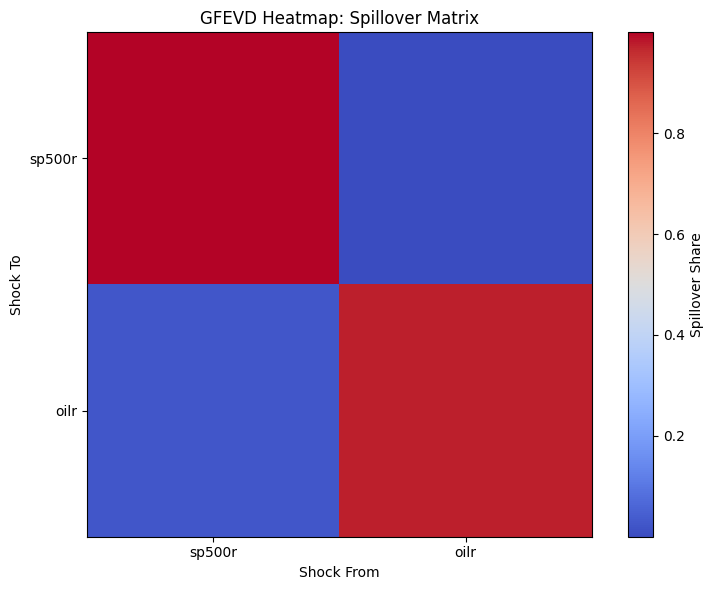

In [ ]:
# Visualization
# Heatmap of GFEVD
plt.figure(figsize=(8, 6))
plt.title("GFEVD Heatmap: Spillover Matrix")
plt.imshow(gfevd, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Spillover Share')
plt.xticks(ticks=np.arange(k), labels=var_names)
plt.yticks(ticks=np.arange(k), labels=var_names)
plt.xlabel('Shock From')
plt.ylabel('Shock To')
plt.tight_layout()
plt.show()

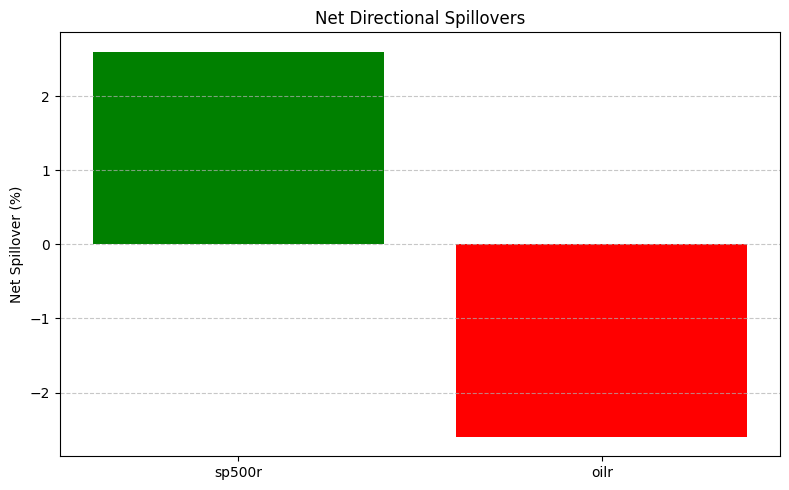

In [ ]:
# Bar chart of Net Spillovers
plt.figure(figsize=(8, 5))
bars = plt.bar(spillover_summary['Variable'], spillover_summary['Net Spillover (%)'],
               color=['green' if x >= 0 else 'red' for x in spillover_summary['Net Spillover (%)']])
plt.title("Net Directional Spillovers")
plt.ylabel("Net Spillover (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**DYNAMIC SPILLOVER BETWEEN GLOBAL FINANCIAL AND COMMODITY MARKETS (WITH ROLLING WINDOWS):**

In [ ]:
# Spillover with Rolling Windows

import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Parameters
window_size = 100   # rolling window length
horizon = 10        # GFEVD forecast horizon
step = 1            # window step
returns_data = df[['sp500r', 'oilr']].dropna()

# Containers
tsi_series = []
spillover_series = []

# Rolling GFEVD estimation
for start in range(0, len(returns_data) - window_size + 1, step):
    window_data = returns_data.iloc[start: start + window_size]
    var_model = VAR(window_data)
    try:
        result = var_model.fit(1)
        sigma_u = result.sigma_u.values
        ma_matrices = result.ma_rep(maxn=horizon)

        k = window_data.shape[1]
        gfevd = np.zeros((k, k))
        for i in range(k):
            for j in range(k):
                num = sum((ma_matrices[h][i, j] ** 2) * sigma_u[j, j] for h in range(horizon))
                denom = sum(sum((ma_matrices[h][i, l] ** 2) * sigma_u[l, l] for l in range(k)) for h in range(horizon))
                gfevd[i, j] = num / denom if denom != 0 else 0.0

        gfevd = gfevd / gfevd.sum(axis=1, keepdims=True)
        tsi = 100 * (np.sum(gfevd) - np.trace(gfevd)) / k
        tsi_series.append(tsi)
        spillover_series.append(gfevd)

    except Exception as e:
        tsi_series.append(np.nan)
        spillover_series.append(np.full((k, k), np.nan))

# Align dates with TSI
dates = returns_data.index[window_size - 1:window_size - 1 + len(tsi_series)]

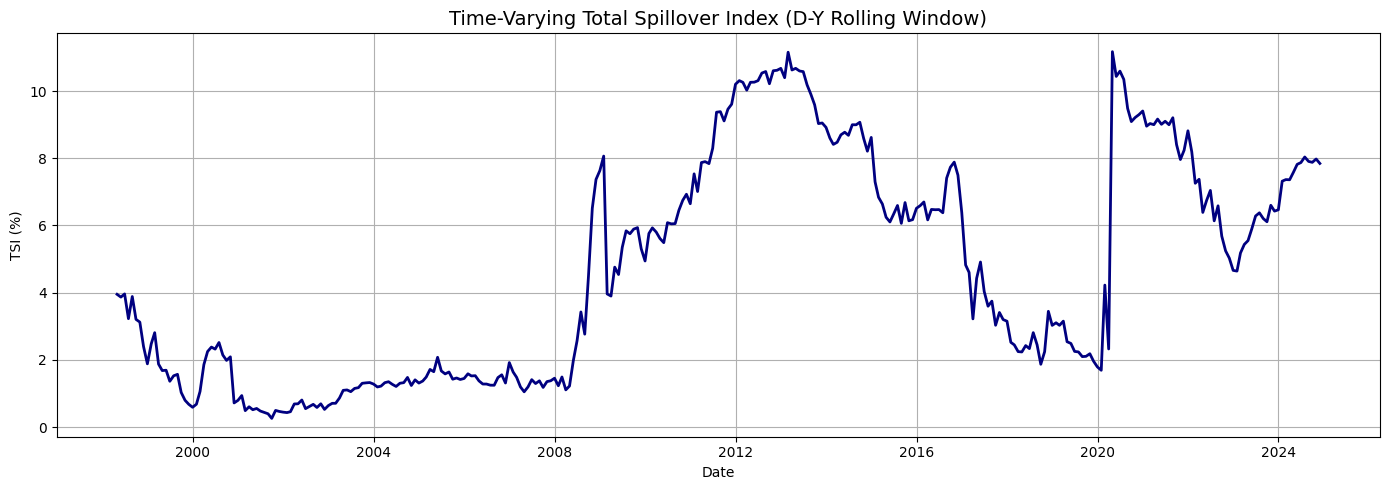

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(dates, tsi_series, color='navy', linewidth=2)
plt.title("Time-Varying Total Spillover Index (D-Y Rolling Window)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("TSI (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

**DYNAMIC SPILLOVER BETWEEN FINANCIAL AND COMMODITY MARKETS (WITH EXTERNAL SHOCKS OF GPR, TRADE WAR, AND ENVIRONMENTAL DISASTER):**

*Here, we extend the analysis to test to what degree external shocks—that is, geopolitical tensions, trade uncertainty, and environmental disasters—originate spillover effects between the commodity and financial markets. Here, we look at whether such shocks increase interconnectedness or give rise to contagion effects, particularly for episodes of sequenced global crises or turmoil.*

In [ ]:
# Spillovers with External Shocks of GPR, Trade war, and Environmental shock
exog = df[['gpr', 'twar', 'env']].dropna()
aligned_idx = returns_data.index.intersection(exog.index)
Y = returns_data.loc[aligned_idx]
X = exog.loc[aligned_idx]
X = (X - X.mean()) / X.std()

# Fit VAR-X
model = VAR(endog=Y, exog=X)
results = model.fit(maxlags=1)

# GFEVD
sigma_u = results.sigma_u.values
ma_matrices = results.ma_rep(maxn=horizon)

k = Y.shape[1]
gfevd_exog = np.zeros((k, k))
for i in range(k):
    for j in range(k):
        num = sum((ma_matrices[h][i, j] ** 2) * sigma_u[j, j] for h in range(horizon))
        denom = sum(sum((ma_matrices[h][i, l] ** 2) * sigma_u[l, l] for l in range(k)) for h in range(horizon))
        gfevd_exog[i, j] = num / denom if denom != 0 else 0.0

gfevd_exog = gfevd_exog / gfevd_exog.sum(axis=1, keepdims=True)
tsi_exog = 100 * (np.sum(gfevd_exog) - np.trace(gfevd_exog)) / k

print("\nGFEVD with External Shocks (VAR-X):")
display(pd.DataFrame(gfevd_exog, index=Y.columns, columns=Y.columns).round(4))
print(f"\nTotal Spillover Index (with exogenous shocks): {tsi_exog:.2f}%")


GFEVD with External Shocks (VAR-X):


sp500r    oilr
sp500r  0.9999  0.0001
oilr    0.0254  0.9746


Total Spillover Index (with exogenous shocks): 1.27%


**DYNAMIC SPILLOVER OF EXTERNAL SHOCKS TO GLOBAL FINANCIAL MARKET:**

In [ ]:
# Split returns by sign of Financial Market Return (SP500R)
positive_idx = returns_data['sp500r'] > 0
negative_idx = returns_data['sp500r'] < 0

def compute_gfevd_subset(data_subset):
    model = VAR(data_subset)
    results = model.fit(1)
    sigma_u = results.sigma_u.values
    ma_matrices = results.ma_rep(maxn=horizon)

    k = data_subset.shape[1]
    gfevd = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            num = sum((ma_matrices[h][i, j] ** 2) * sigma_u[j, j] for h in range(horizon))
            denom = sum(sum((ma_matrices[h][i, l] ** 2) * sigma_u[l, l] for l in range(k)) for h in range(horizon))
            gfevd[i, j] = num / denom if denom != 0 else 0.0
    gfevd = gfevd / gfevd.sum(axis=1, keepdims=True)
    return 100 * (np.sum(gfevd) - np.trace(gfevd)) / k

# Compute TSI for positive and negative regimes
tsi_pos = compute_gfevd_subset(returns_data[positive_idx])
tsi_neg = compute_gfevd_subset(returns_data[negative_idx])
sai = (tsi_pos - tsi_neg) / (tsi_pos + tsi_neg)

print(f"\n🔺 TSI (Positive Regimes): {tsi_pos:.2f}%")
print(f"🔻 TSI (Negative Regimes): {tsi_neg:.2f}%")
print(f"\nSpillover Asymmetry Index (SAI): {sai:.4f}")


🔺 TSI (Positive Regimes): 1.19%
🔻 TSI (Negative Regimes): 0.66%

Spillover Asymmetry Index (SAI): 0.2882


**DYNAMIC SPILLOVER OF EXTERNAL SHOCKS TO GLOBAL COMMODITY MARKET:**

In [ ]:
# Split returns by sign of Commodity Market Return (OILR)
positive_idx = returns_data['oilr'] > 0
negative_idx = returns_data['oilr'] < 0

def compute_gfevd_subset(data_subset):
    model = VAR(data_subset)
    results = model.fit(1)
    sigma_u = results.sigma_u.values
    ma_matrices = results.ma_rep(maxn=horizon)

    k = data_subset.shape[1]
    gfevd = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            num = sum((ma_matrices[h][i, j] ** 2) * sigma_u[j, j] for h in range(horizon))
            denom = sum(sum((ma_matrices[h][i, l] ** 2) * sigma_u[l, l] for l in range(k)) for h in range(horizon))
            gfevd[i, j] = num / denom if denom != 0 else 0.0
    gfevd = gfevd / gfevd.sum(axis=1, keepdims=True)
    return 100 * (np.sum(gfevd) - np.trace(gfevd)) / k

# Compute TSI for positive and negative regimes
tsi_pos = compute_gfevd_subset(returns_data[positive_idx])
tsi_neg = compute_gfevd_subset(returns_data[negative_idx])
sai = (tsi_pos - tsi_neg) / (tsi_pos + tsi_neg)

print(f"\n🔺 TSI (Positive Regimes): {tsi_pos:.2f}%")
print(f"🔻 TSI (Negative Regimes): {tsi_neg:.2f}%")
print(f"\nSpillover Asymmetry Index (SAI): {sai:.4f}")



🔺 TSI (Positive Regimes): 0.40%
🔻 TSI (Negative Regimes): 4.00%

Spillover Asymmetry Index (SAI): -0.8181


**DYNAMIC SPILLOVER BETWEEN GLOBAL FINANCIAL AND COMMODITY MARKETS WITH GLOBAL EVENTS CLUSTERING:**

In [ ]:
# Define Shock Events
event_dict = {
    "1991-01": "🔥 Gulf War",
    "1997-07": "🔥 Asian Crisis",
    "1998-08": "🔥 Russian Crisis",
    "2001-09": "🔥 9/11 Attacks",
    "2003-03": "🔥 Iraq War",
    "2011-01": "🔥 Arab Spring",
    "2014-03": "🔥 Crimea Crisis",
    "2022-02": "🔥 Ukraine Invasion",
    "2023-04": "🔥 Sudan Conflict",

    "1999-12": "📦 Seattle WTO",
    "2018-07": "📦 US-China Trade War",
    "2024-01": "📦 Rare Earth Ban",
    "2024-07": "📦 Global Tariffs",

    "2010-04": "🌍 BP Oil Spill",
    "2011-03": "🌍 Fukushima",
    "2022-07": "🌍 EU Heatwaves",
    "2024-06": "🌍 Alau Dam Collapse",
    "2025-02": "🌍 Zambia Dam Disaster"
}

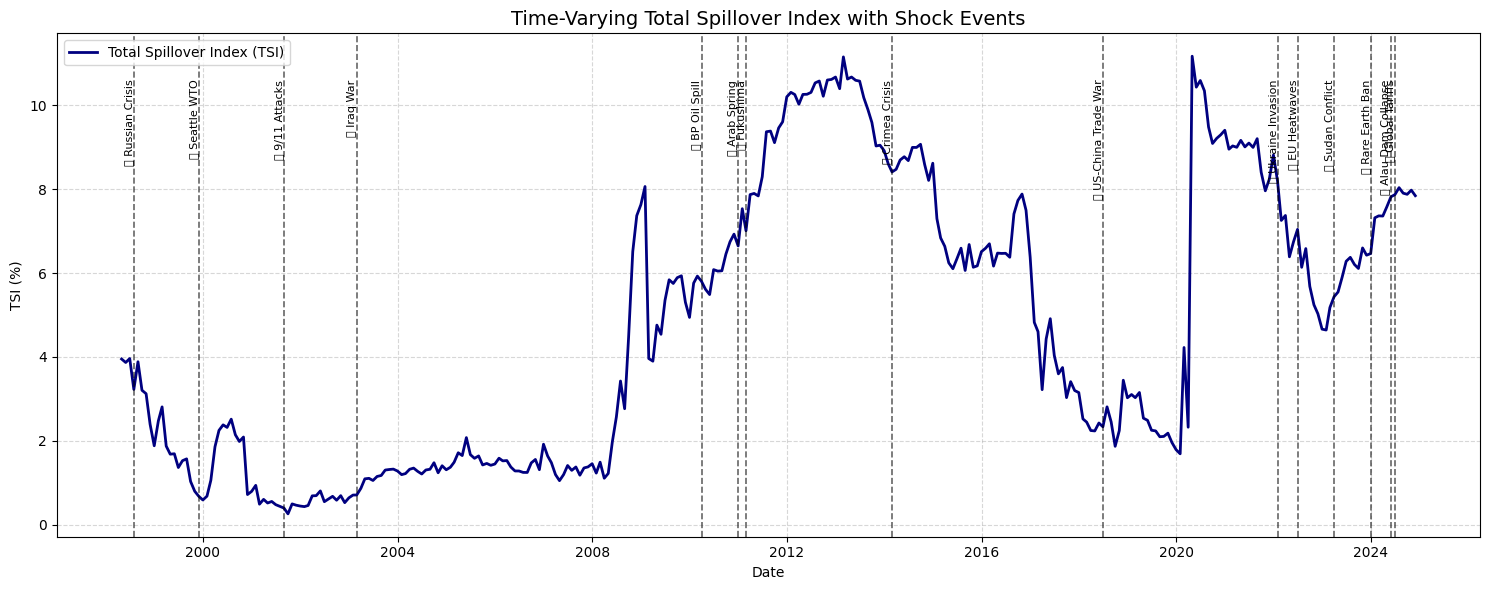

In [ ]:
# Plot TSI with Event Overlays
plt.figure(figsize=(15, 6))
plt.plot(dates, tsi_series, color='navy', linewidth=2, label="Total Spillover Index (TSI)")

# Add event lines and labels
for event_date, label in event_dict.items():
    try:
        event_datetime = pd.to_datetime(event_date)
        if dates.min() <= event_datetime <= dates.max():
            plt.axvline(event_datetime, color='black', linestyle='--', linewidth=1.2, alpha=0.6)
            plt.text(event_datetime, max(tsi_series) * 0.95, label, rotation=90, fontsize=8,
                     verticalalignment='top', horizontalalignment='right')
    except:
        continue

plt.title("Time-Varying Total Spillover Index with Shock Events", fontsize=14)
plt.xlabel("Date")
plt.ylabel("TSI (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

#**PREDICTION AND FORECASTING USING ADVANCED MACHINE LEARNING MODEL: LSTM FRAMEWORK**

*The fourth part employs LSTM models to forecast financial and commodity market trends. The forecasts are provided with and without confidence bounds to provide a range of probable outcomes. The model also embodies dynamic patterns of the market forecasts under different conditions, which provides valuable information to handle risks and conduct policy planning under uncertainty.*

In [ ]:
!pip install tensorflow
!pip install keras

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2765 - val_loss: 0.1213
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0444 - val_loss: 0.0220
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0270 - val_loss: 0.0210
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0263 - val_loss: 0.0408
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0227 - val_loss: 0.0337
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0223 - val_loss: 0.0365
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0214 - val_loss: 0.0229
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0188 - val_loss: 0.0215
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0222 - val_loss: 0.0235
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0257 - val_loss: 0.0148
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208 - val_loss: 0.0162
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

  0%|          | 0/82 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━

<Figure size 640x480 with 0 Axes>

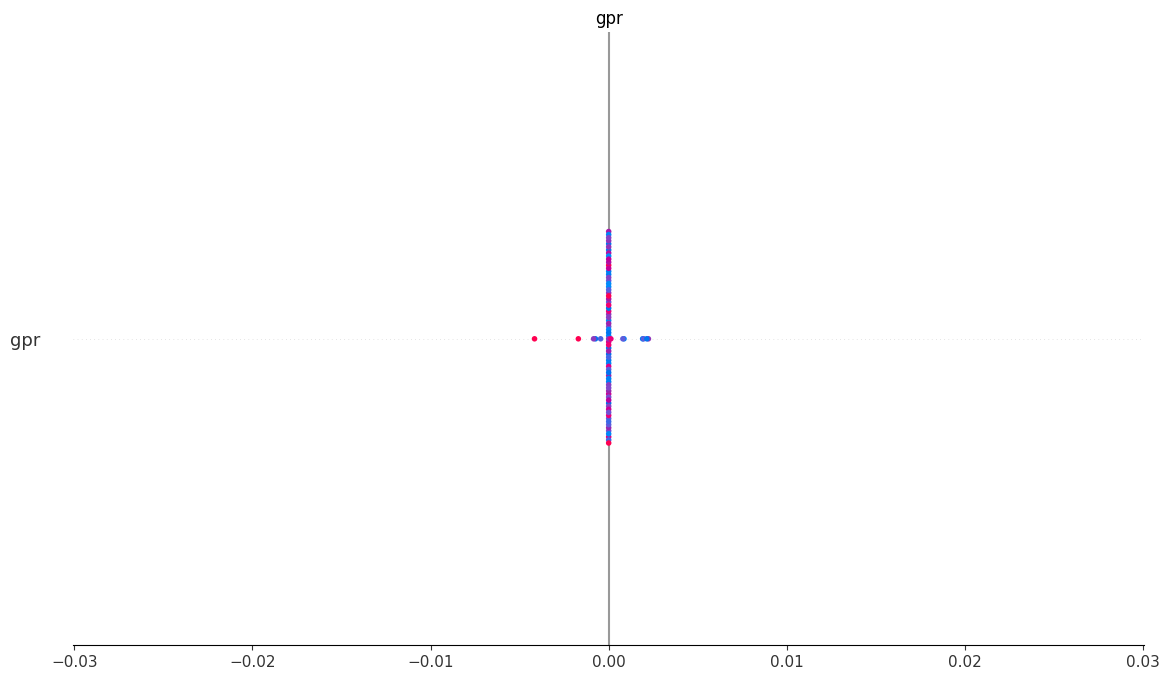

Mean SHAP Importance
env               0.002194
gpr               0.001359
twar              0.000925


SHAP Feature Importances for OILR:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/82 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━

<Figure size 640x480 with 0 Axes>

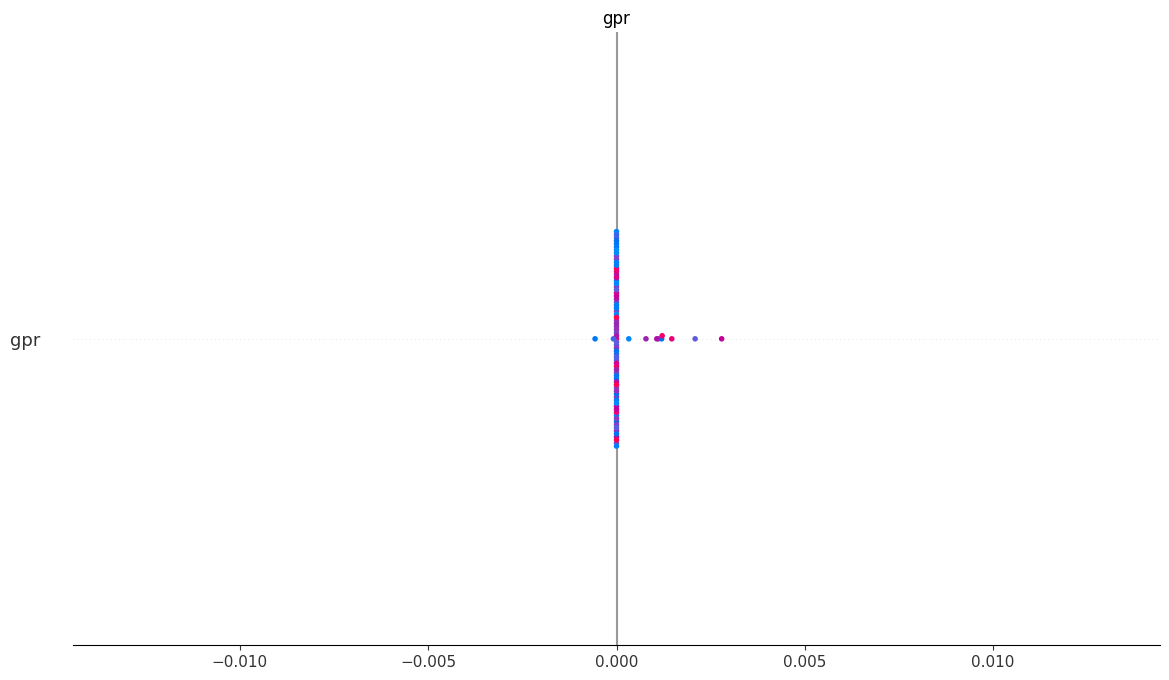

Mean SHAP Importance
env               0.001127
twar              0.000904
gpr               0.000221

In [ ]:
# LSTM ANALYSIS

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import shap
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Target variables
df = df[['sp500r', 'oilr', 'gpr', 'twar', 'env']].dropna()

# Data scaling
scalers = {}
scaled_data = {}

for col in df.columns:
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[[col]])
    scaled_data[col] = scaled
    scalers[col] = scaler

scaled_df = pd.DataFrame({col: scaled_data[col].flatten() for col in df.columns}, index=df.index)

# Sequence generator
def create_sequences(data, target_col, lookback=12):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i][['gpr', 'twar', 'env']].values)
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

X_sp, y_sp = create_sequences(scaled_df, 'sp500r')
X_oil, y_oil = create_sequences(scaled_df, 'oilr')

# Train-Test split
split_idx = int(0.8 * len(X_sp))
X_sp_train, X_sp_test = X_sp[:split_idx], X_sp[split_idx:]
y_sp_train, y_sp_test = y_sp[:split_idx], y_sp[split_idx:]

X_oil_train, X_oil_test = X_oil[:split_idx], X_oil[split_idx:]
y_oil_train, y_oil_test = y_oil[:split_idx], y_oil[split_idx:]

# LSTM model builder
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Training LSTM models
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_sp = build_lstm_model(X_sp_train.shape[1:])
history_sp = model_sp.fit(X_sp_train, y_sp_train, epochs=100, batch_size=16, validation_split=0.1,
                          callbacks=[early_stop], verbose=1)

model_oil = build_lstm_model(X_oil_train.shape[1:])
history_oil = model_oil.fit(X_oil_train, y_oil_train, epochs=100, batch_size=16, validation_split=0.1,
                            callbacks=[early_stop], verbose=1)

# Model evaluation
def evaluate_model(model, X_test, y_test, scaler, label):
    y_pred_scaled = model.predict(X_test).flatten()
    y_pred = scaler.inverse_transform(np.expand_dims(y_pred_scaled, axis=1)).flatten()
    y_true = scaler.inverse_transform(np.expand_dims(y_test, axis=1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"Evaluation for {label.upper()} — RMSE: {rmse:.3f}, R²: {r2:.3f}")

    results = pd.DataFrame({
        'Actual': np.round(y_true, 3),
        'Predicted': np.round(y_pred, 3)
    })
    return results

results_sp = evaluate_model(model_sp, X_sp_test, y_sp_test, scalers['sp500r'], 'sp500r')
results_oil = evaluate_model(model_oil, X_oil_test, y_oil_test, scalers['oilr'], 'oilr')

# SHAP using KernelExplainer
def explain_with_shap_kernel(model, X_background, X_test_sample, feature_names):
    def predict_fn(x):
        x_reshaped = x.reshape((x.shape[0], X_background.shape[1], X_background.shape[2]))
        return model.predict(x_reshaped)

    X_flat = X_background.reshape((X_background.shape[0], -1))
    X_test_flat = X_test_sample.reshape((X_test_sample.shape[0], -1))

    explainer = shap.KernelExplainer(predict_fn, X_flat)
    shap_values = explainer.shap_values(X_test_flat, nsamples=100)

    shap.summary_plot(shap_values, X_test_flat, feature_names=np.repeat(feature_names, X_background.shape[1]), plot_type="bar")

    # SHAP table
    shap_df = pd.DataFrame(np.abs(shap_values).mean(axis=0), index=np.repeat(feature_names, X_background.shape[1]), columns=['Mean SHAP Importance'])
    shap_df = shap_df.groupby(shap_df.index).mean().sort_values(by='Mean SHAP Importance', ascending=False)
    return shap_df

print("\nSHAP Feature Importances for SP500R:")
shap_table_sp = explain_with_shap_kernel(model_sp, X_sp_train[:100], X_sp_test[:100], ['gpr', 'twar', 'env'])
display(shap_table_sp)

print("\nSHAP Feature Importances for OILR:")
shap_table_oil = explain_with_shap_kernel(model_oil, X_oil_train[:100], X_oil_test[:100], ['gpr', 'twar', 'env'])
display(shap_table_oil)

In [ ]:
# MODEL PERFORMANCE

from sklearn.metrics import mean_absolute_error

def extended_evaluation(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{label.upper()} Model Performance:")
    metrics = pd.DataFrame({
        'Metric': ['RMSE', 'MAE', 'R-squared', 'MAPE (%)'],
        'Value': [round(rmse, 3), round(mae, 3), round(r2, 3), round(mape, 3)]
    })
    display(metrics)

    return metrics

# Run metrics
extended_evaluation(results_sp['Actual'], results_sp['Predicted'], 'sp500r')
extended_evaluation(results_oil['Actual'], results_oil['Predicted'], 'oilr')


SP500R Model Performance:


Metric  Value
0       RMSE  0.051
1        MAE  0.038
2  R-squared -0.051
3   MAPE (%)    inf


OILR Model Performance:


Metric    Value
0       RMSE    0.138
1        MAE    0.086
2  R-squared   -0.078
3   MAPE (%)  123.569

Metric    Value
0       RMSE    0.138
1        MAE    0.086
2  R-squared   -0.078
3   MAPE (%)  123.569

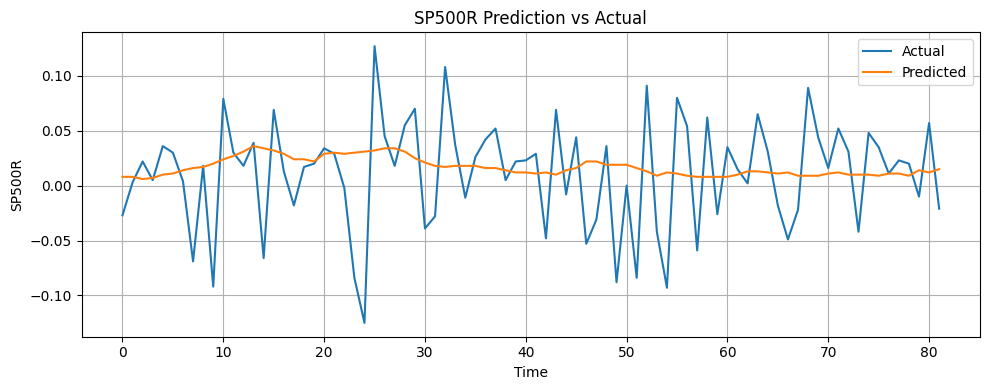

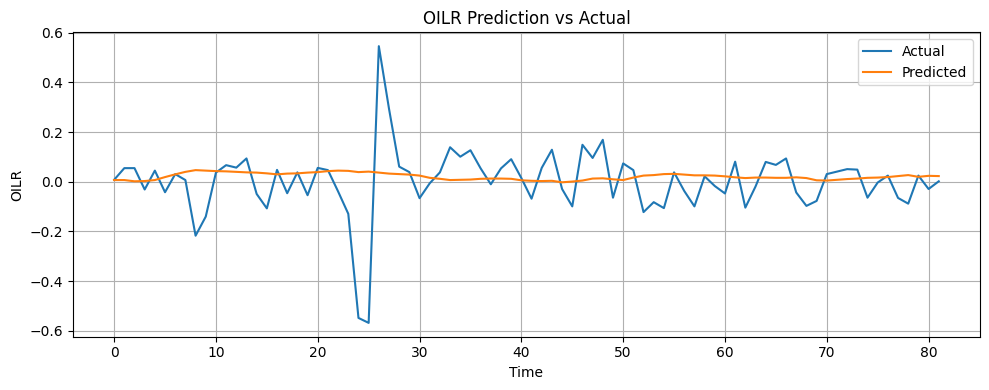

In [ ]:
# PREDICTION PLOT

def plot_predictions(results, label):
    plt.figure(figsize=(10, 4))
    plt.plot(results['Actual'].values, label='Actual')
    plt.plot(results['Predicted'].values, label='Predicted')
    plt.title(f"{label.upper()} Prediction vs Actual")
    plt.xlabel('Time')
    plt.ylabel(label.upper())
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_predictions(results_sp, 'sp500r')
plot_predictions(results_oil, 'oilr')

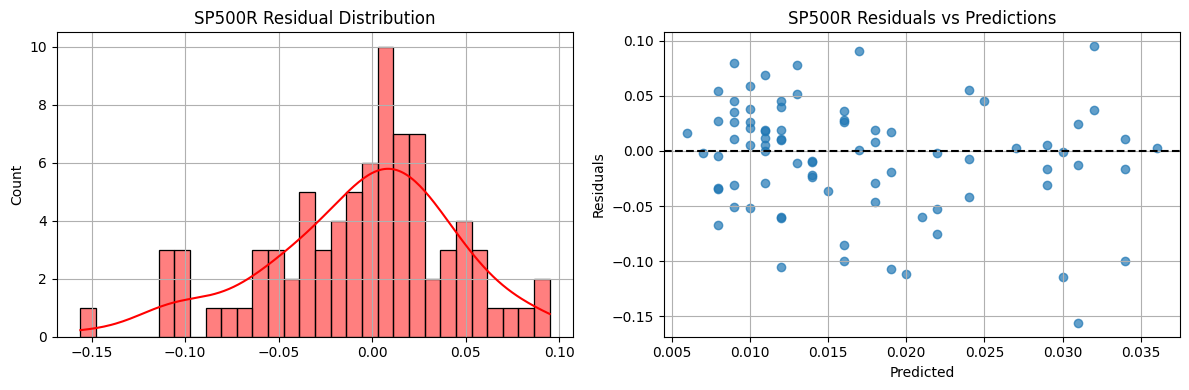

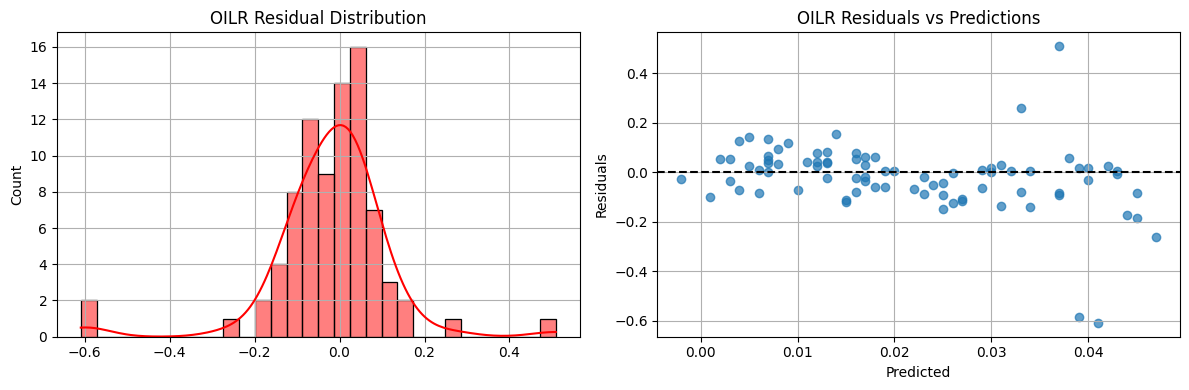

In [ ]:
# DIAGNOSTIC TEST

def residual_diagnostics(results, label):
    residuals = results['Actual'] - results['Predicted']

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, bins=30, color='red')
    plt.title(f"{label.upper()} Residual Distribution")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(results['Predicted'], residuals, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(f"{label.upper()} Residuals vs Predictions")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

residual_diagnostics(results_sp, 'sp500r')
residual_diagnostics(results_oil, 'oilr')

In [ ]:
# MODEL FORECAST FOR THE NEXT 12 MONTHS


def forecast_next_n(model, full_data, lookback, n_steps, scaler, feature_cols, target_col):
    recent_seq = full_data[-lookback:].copy()
    predictions = []

    for _ in range(n_steps):
        x_input = recent_seq[feature_cols].values.reshape(1, lookback, len(feature_cols))
        pred_scaled = model.predict(x_input, verbose=0)[0][0]
        pred_actual = scaler.inverse_transform([[pred_scaled]])[0][0]
        predictions.append(pred_actual)

        # Prepare the next row with the predicted target value and same features
        next_row = recent_seq.iloc[-1].copy()
        next_row[target_col] = pred_scaled  # predicted target value
        next_row_df = pd.DataFrame([next_row])

        # Concatenate and drop the first row to maintain rolling window
        recent_seq = pd.concat([recent_seq, next_row_df], ignore_index=True)
        recent_seq = recent_seq.iloc[1:]

    # Create forecast date index
    future_dates = pd.date_range(start=full_data.index[-1] + pd.DateOffset(months=1), periods=n_steps, freq='M')
    forecast_df = pd.DataFrame({f"{target_col.upper()} Forecast": predictions}, index=future_dates)

    return forecast_df

FINANCIAL MARKET FORECAST:

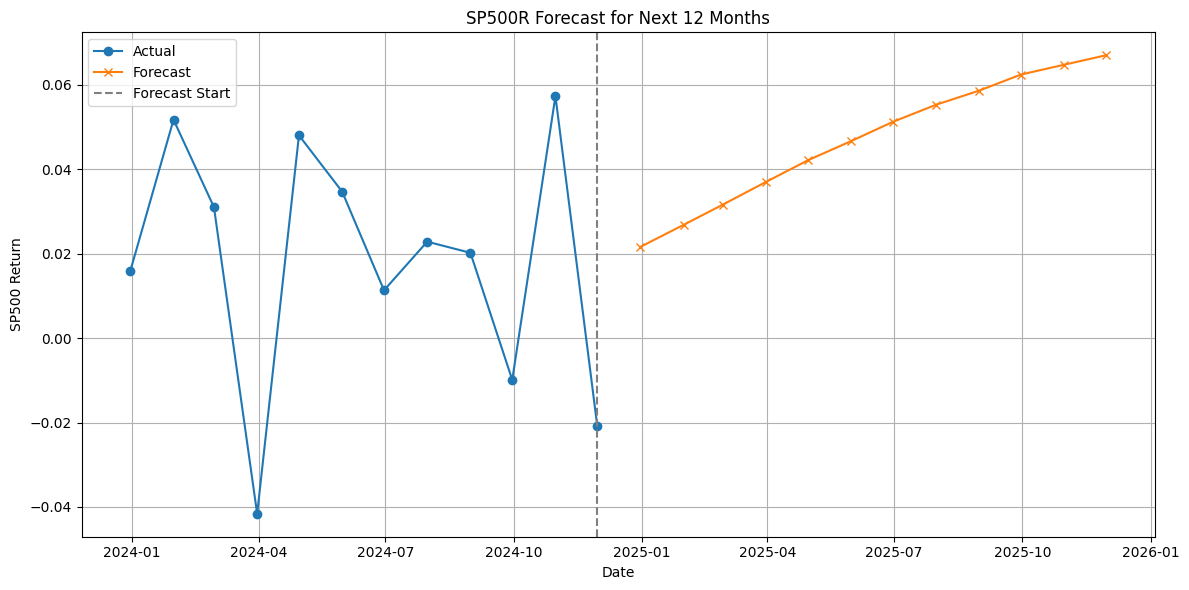

In [ ]:
# Forecast next 12 months
forecast_sp500r = forecast_next_n(model_sp, scaled_df, lookback=12, n_steps=12,
                                   scaler=scalers['sp500r'],
                                   feature_cols=['gpr', 'twar', 'env'], target_col='sp500r')

# Combine with actual data for visual continuity
last_actual = df['sp500r'].iloc[-12:]  # last 12 months of actual data
combined_sp = pd.concat([
    pd.DataFrame({'SP500R Actual': last_actual.values}, index=last_actual.index),
    forecast_sp500r
], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_sp.index, combined_sp.iloc[:, 0], label='Actual', marker='o')
plt.plot(combined_sp.index, combined_sp.iloc[:, 1], label='Forecast', marker='x')
plt.axvline(x=last_actual.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('SP500R Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('SP500 Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

COMMODITY MARKET FORECAST:

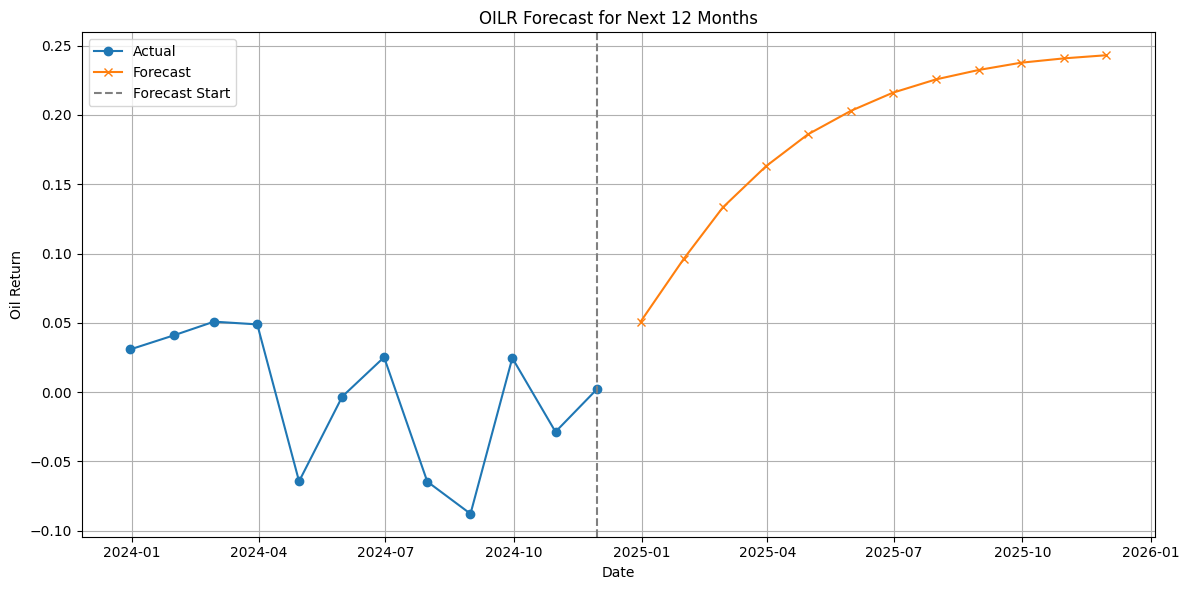

In [ ]:
# Forecast next 12 months for OILR
forecast_oilr = forecast_next_n(model_oil, scaled_df, lookback=12, n_steps=12,
                                 scaler=scalers['oilr'],
                                 feature_cols=['gpr', 'twar', 'env'], target_col='oilr')

# Last 12 months of actual oil return
last_actual_oil = df['oilr'].iloc[-12:]

# Combine for continuity
combined_oil = pd.concat([
    pd.DataFrame({'OILR Actual': last_actual_oil.values}, index=last_actual_oil.index),
    forecast_oilr
], axis=0)

plt.figure(figsize=(12, 6))
plt.plot(combined_oil.index, combined_oil.iloc[:, 0], label='Actual', marker='o')
plt.plot(combined_oil.index, combined_oil.iloc[:, 1], label='Forecast', marker='x')
plt.axvline(x=last_actual_oil.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('OILR Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Oil Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

FINANCIAL MARKET FORECAST (WITH CONFIDENCE BOND):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


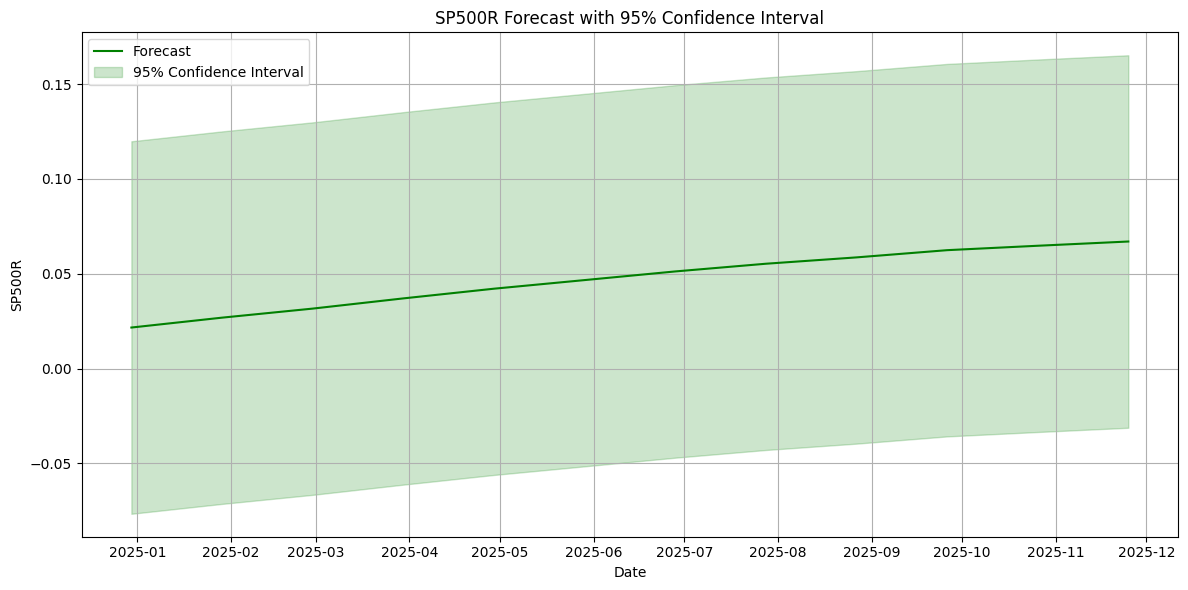

In [ ]:
# Forecast SP500R with Confidence Bands

import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Forecast function
def forecast_next_n(model, scaled_df, lookback, n_steps, scaler, feature_cols, target_col):
    last_seq = scaled_df[feature_cols].values[-lookback:].reshape(1, lookback, len(feature_cols))
    forecasts = []

    for _ in range(n_steps):
        pred_scaled = model.predict(last_seq)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]
        forecasts.append(pred)

        # Update sequence with predicted features
        next_features = scaled_df[feature_cols].values[-1].reshape(1, -1)
        new_seq = np.append(last_seq[:, 1:, :], [next_features], axis=1)
        last_seq = new_seq

    # Construct forecast DataFrame
    forecast_dates = [scaled_df.index[-1] + timedelta(days=30 * (i+1)) for i in range(n_steps)]
    forecast_df = pd.DataFrame({'SP500R Forecast': forecasts}, index=forecast_dates)
    return forecast_df

# Forecast for 12 months
forecast_sp500r = forecast_next_n(model_sp, scaled_df, lookback=12, n_steps=12,
                                   scaler=scalers['sp500r'],
                                   feature_cols=['gpr', 'twar', 'env'],
                                   target_col='sp500r')

# Calculate residuals from test set
y_sp_pred_scaled = model_sp.predict(X_sp_test).flatten()
y_sp_pred = scalers['sp500r'].inverse_transform(y_sp_pred_scaled.reshape(-1, 1)).flatten()
y_sp_true = scalers['sp500r'].inverse_transform(y_sp_test.reshape(-1, 1)).flatten()
residuals_sp = y_sp_true - y_sp_pred
residual_std_sp = np.std(residuals_sp)

# Add confidence intervals
forecast_sp500r['Lower CI'] = forecast_sp500r['SP500R Forecast'] - 1.96 * residual_std_sp
forecast_sp500r['Upper CI'] = forecast_sp500r['SP500R Forecast'] + 1.96 * residual_std_sp

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_sp500r.index, forecast_sp500r['SP500R Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_sp500r.index,
                 forecast_sp500r['Lower CI'], forecast_sp500r['Upper CI'],
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('SP500R Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('SP500R')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

COMMODITY MARKET FORECAST (WITH CONFIDENCE BOND):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


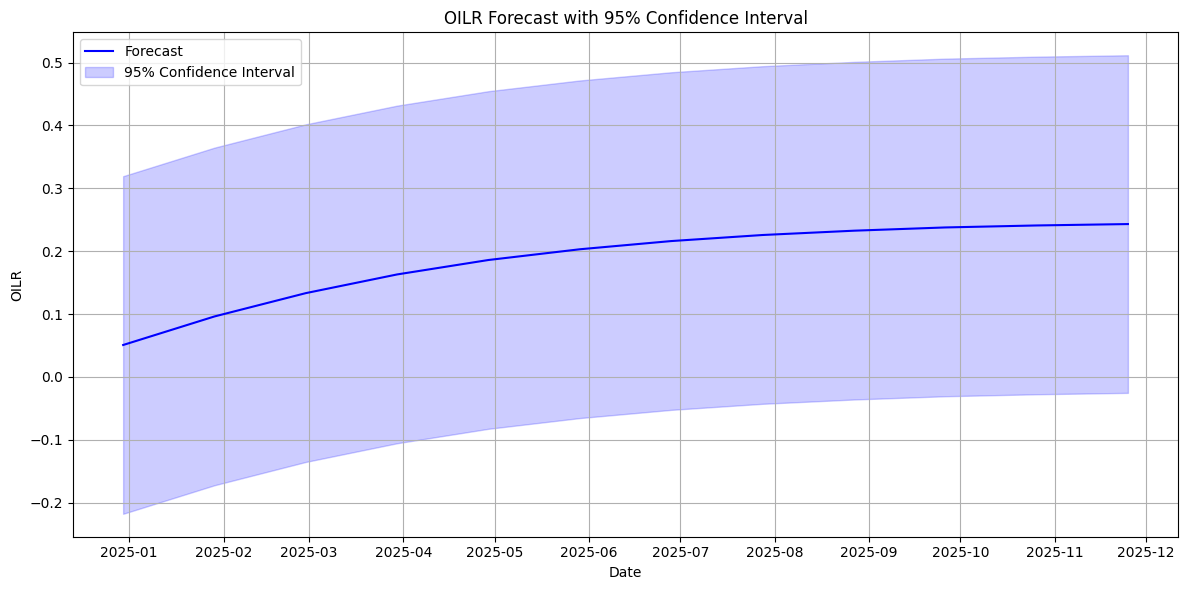

In [ ]:
# Forecast OILR with Confidence Bands

import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Forecast function
def forecast_next_n(model, scaled_df, lookback, n_steps, scaler, feature_cols, target_col):
    last_seq = scaled_df[feature_cols].values[-lookback:].reshape(1, lookback, len(feature_cols))
    forecasts = []

    for _ in range(n_steps):
        pred_scaled = model.predict(last_seq)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]
        forecasts.append(pred)

        # Update sequence with predicted features
        next_features = scaled_df[feature_cols].values[-1].reshape(1, -1)
        new_seq = np.append(last_seq[:, 1:, :], [next_features], axis=1)
        last_seq = new_seq

    # Construct forecast DataFrame
    forecast_dates = [scaled_df.index[-1] + timedelta(days=30 * (i+1)) for i in range(n_steps)]
    forecast_df = pd.DataFrame({'OILR Forecast': forecasts}, index=forecast_dates)
    return forecast_df

# Forecast for 12 months
forecast_oilr = forecast_next_n(model_oil, scaled_df, lookback=12, n_steps=12,
                                 scaler=scalers['oilr'],
                                 feature_cols=['gpr', 'twar', 'env'],
                                 target_col='oilr')

# Calculate residuals from test set
y_oil_pred_scaled = model_oil.predict(X_oil_test).flatten()
y_oil_pred = scalers['oilr'].inverse_transform(y_oil_pred_scaled.reshape(-1, 1)).flatten()
y_oil_true = scalers['oilr'].inverse_transform(y_oil_test.reshape(-1, 1)).flatten()
residuals_oil = y_oil_true - y_oil_pred
residual_std_oil = np.std(residuals_oil)

# Add confidence intervals
forecast_oilr['Lower CI'] = forecast_oilr['OILR Forecast'] - 1.96 * residual_std_oil
forecast_oilr['Upper CI'] = forecast_oilr['OILR Forecast'] + 1.96 * residual_std_oil

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_oilr.index, forecast_oilr['OILR Forecast'], label='Forecast', color='blue')
plt.fill_between(forecast_oilr.index,
                 forecast_oilr['Lower CI'], forecast_oilr['Upper CI'],
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('OILR Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('OILR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**DYNAMIC FORECAST OF FINANCIAL AND COMMODITY MARKETS:**

FINANCIAL MARKET:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


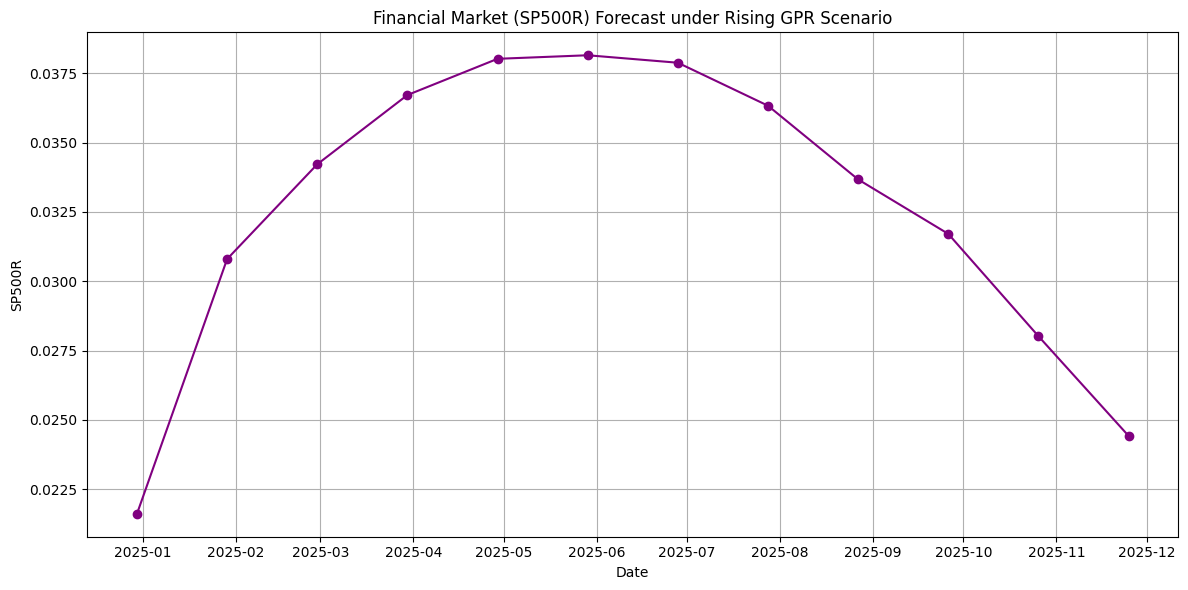

In [ ]:
# Dynamic Forecast for SP500R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Define future shocks (rising GPR Vs. Stable Trade War Vs. Moderate environmental shock)
future_gpr = np.linspace(0.8, 1.5, 12)   # Increasing geopolitical risk
future_twar = np.linspace(0.5, 0.5, 12)  # Assume stable trade war tension
future_env = np.linspace(0.6, 0.7, 12)   # Slightly rising environmental stress

# Stack the simulated features
simulated_features = np.stack([future_gpr, future_twar, future_env], axis=1)

# Forecast function
def simulate_forecast(model, scaled_df, lookback, simulated_features, scaler, feature_cols, target_col):
    seq = scaled_df[feature_cols].values[-lookback:].reshape(1, lookback, len(feature_cols))
    predictions = []

    for i in range(len(simulated_features)):
        pred_scaled = model.predict(seq)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]
        predictions.append(pred)

        # Update sequence
        next_step_input = simulated_features[i].reshape(1, 1, -1)
        seq = np.append(seq[:, 1:, :], next_step_input, axis=1)

    # Generate future forecast dates
    forecast_dates = [scaled_df.index[-1] + timedelta(days=30 * (i + 1)) for i in range(len(simulated_features))]
    forecast_df = pd.DataFrame({'Simulated SP500R Forecast': predictions}, index=forecast_dates)
    return forecast_df

# Run simulation
sim_sp500r = simulate_forecast(model_sp, scaled_df, lookback=12,
                               simulated_features=simulated_features,
                               scaler=scalers['sp500r'],
                               feature_cols=['gpr', 'twar', 'env'],
                               target_col='sp500r')

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(sim_sp500r.index, sim_sp500r['Simulated SP500R Forecast'], marker='o', color='purple')
plt.title('Financial Market (SP500R) Forecast under Rising GPR Scenario')
plt.xlabel('Date')
plt.ylabel('SP500R')
plt.grid(True)
plt.tight_layout()
plt.show()

COMMODITY MARKET:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


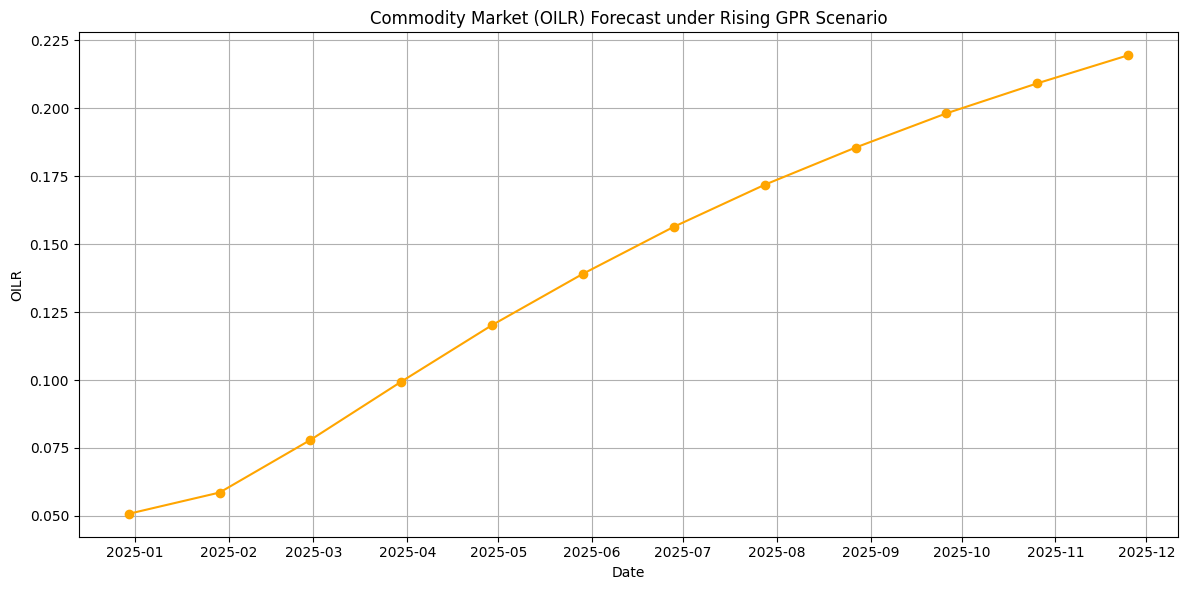

In [ ]:
# Dynamic Forecast for OILR

# Define future shocks (rising GPR Vs. Stable Trade War Vs. Moderate environmental shock)
future_gpr = np.linspace(0.8, 1.5, 12)
future_twar = np.linspace(0.5, 0.5, 12)
future_env = np.linspace(0.6, 0.7, 12)
simulated_features = np.stack([future_gpr, future_twar, future_env], axis=1)

# Forecast shocks
def simulate_forecast(model, scaled_df, lookback, simulated_features, scaler, feature_cols, target_col):
    seq = scaled_df[feature_cols].values[-lookback:].reshape(1, lookback, len(feature_cols))
    predictions = []

    for i in range(len(simulated_features)):
        pred_scaled = model.predict(seq)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]
        predictions.append(pred)

        next_step_input = simulated_features[i].reshape(1, 1, -1)
        seq = np.append(seq[:, 1:, :], next_step_input, axis=1)

    forecast_dates = [scaled_df.index[-1] + timedelta(days=30 * (i + 1)) for i in range(len(simulated_features))]
    forecast_df = pd.DataFrame({'Simulated OILR Forecast': predictions}, index=forecast_dates)
    return forecast_df

# Run simulation
sim_oilr = simulate_forecast(model_oil, scaled_df, lookback=12,
                             simulated_features=simulated_features,
                             scaler=scalers['oilr'],
                             feature_cols=['gpr', 'twar', 'env'],
                             target_col='oilr')

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(sim_oilr.index, sim_oilr['Simulated OILR Forecast'], marker='o', color='orange')
plt.title('Commodity Market (OILR) Forecast under Rising GPR Scenario')
plt.xlabel('Date')
plt.ylabel('OILR')
plt.grid(True)
plt.tight_layout()
plt.show()